In [ ]:
def embed_watermark(host_img, watermark):
    # Convert watermark to binary
    watermark_binary = watermark > 0
    watermarked_img = host_img.copy()

    # Embed watermark using LSB
    for i in range(watermark_binary.shape[0]):
        for j in range(watermark_binary.shape[1]):
            if watermark_binary[i, j]:  # If the watermark pixel is white
                watermarked_img[i, j] = (watermarked_img[i, j] & ~1) | 1  # Set LSB to 1
            else:
                watermarked_img[i, j] = (watermarked_img[i, j] & ~1)  # Set LSB to 0
    return watermarked_img

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define paths
input_images = [
    '/content/drive/MyDrive/MINOR/Input Raw_images/Cover Image 1.jpg',
    '/content/drive/MyDrive/MINOR/Input Raw_images/Cover Image 2.jpg',
    '/content/drive/MyDrive/MINOR/Input Raw_images/Cover Image 3.jpg',
    '/content/drive/MyDrive/MINOR/Input Raw_images/Cover Image 4.jpg',
    '/content/drive/MyDrive/MINOR/Input Raw_images/Cover Image 5.jpg',
    '/content/drive/MyDrive/MINOR/Input Raw_images/Cover Image 6.jpg',
    '/content/drive/MyDrive/MINOR/Input Raw_images/Cover Image 7.jpg',
    '/content/drive/MyDrive/MINOR/Input Raw_images/Cover Image 8.jpg',
    '/content/drive/MyDrive/MINOR/Input Raw_images/Cover Image 9.jpg',
    '/content/drive/MyDrive/MINOR/Input Raw_images/Cover Image 10.jpg'
]  # List of 10 input images

watermark_path = '/content/drive/MyDrive/MINOR/watermark/binary-code-bitcoin-logo.jpg'  # Single watermark image
output_watermark_folder = '/content/drive/MyDrive/MINOR/recovered_watermarks'  # Output folder for recovered watermarks

# Create output folder if it doesn't exist
os.makedirs(output_watermark_folder, exist_ok=True)

# Load the watermark image
watermark_image = cv2.imread(watermark_path)
watermark_shape = watermark_image.shape  # Get the dimensions of the watermark

# Function to recover the watermark from the watermarked image
def recover_watermark(watermarked_image):
    # Create an empty watermark image
    recovered_watermark = np.zeros_like(watermarked_image)

    # Loop through each pixel of the watermark
    for i in range(watermarked_image.shape[0]):
        for j in range(watermarked_image.shape[1]):
            for c in range(3):  # Loop through each color channel
                recovered_watermark[i, j, c] = (watermarked_image[i, j, c] & 1) * 255  # Scale to 0 or 255

    return recovered_watermark

# Lists to hold original images and extracted watermarks for plotting
original_images = []
extracted_watermarks = []

# Loop through each input image file
for img_path in input_images:
    # Read the original image
    original_img = cv2.imread(img_path)

    # watermarked_image = embed_watermark(original_img, watermark_image)  # Function to embed the watermark (not provided in your code snippet)

    # For demonstration, we will just use the original image since embedding watermark function is not shown

    # Simulating a watermarked image just for the sake of processing
    watermarked_img = original_img.copy()  # Clone original image as a placeholder

    # Recover the watermark
    recovered_watermark = recover_watermark(watermarked_img)

    # Save the recovered watermark
    recovered_watermark_path = os.path.join(output_watermark_folder, f'recovered_{os.path.splitext(os.path.basename(img_path))[0]}.png')
    cv2.imwrite(recovered_watermark_path, recovered_watermark)

    # Append images to lists for plotting
    original_images.append(original_img)
    extracted_watermarks.append(recovered_watermark)

    print(f'Recovered watermark saved: {recovered_watermark_path}')

# Determine the number of images
num_images = len(original_images)
cols = 5  # Number of columns for the subplot
rows = (num_images + cols - 1) // cols  # Calculate the number of rows needed

# Plot original images
plt.figure(figsize=(15, 3 * rows))
for i, original in enumerate(original_images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f'Original Image {i + 1}')

plt.suptitle('Original Images', fontsize=16)
plt.tight_layout()
plt.show()

# Plot extracted watermarks
plt.figure(figsize=(15, 3 * rows))
for i, watermark in enumerate(extracted_watermarks):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(cv2.cvtColor(watermark, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f'Extracted Watermark {i + 1}')

plt.suptitle('Extracted Watermarks', fontsize=16)
plt.tight_layout()
plt.show()

print('Watermark extraction complete for all images.')

✅ Saved: /content/drive/MyDrive/MINOR/Watermarked_Images/watermarked_1.jpg
✅ Saved: /content/drive/MyDrive/MINOR/Watermarked_Images/watermarked_2.jpg
✅ Saved: /content/drive/MyDrive/MINOR/Watermarked_Images/watermarked_3.jpg
✅ Saved: /content/drive/MyDrive/MINOR/Watermarked_Images/watermarked_4.jpg
✅ Saved: /content/drive/MyDrive/MINOR/Watermarked_Images/watermarked_5.jpg
✅ Saved: /content/drive/MyDrive/MINOR/Watermarked_Images/watermarked_6.jpg
✅ Saved: /content/drive/MyDrive/MINOR/Watermarked_Images/watermarked_7.jpg
✅ Saved: /content/drive/MyDrive/MINOR/Watermarked_Images/watermarked_8.jpg
✅ Saved: /content/drive/MyDrive/MINOR/Watermarked_Images/watermarked_9.jpg
✅ Saved: /content/drive/MyDrive/MINOR/Watermarked_Images/watermarked_10.jpg


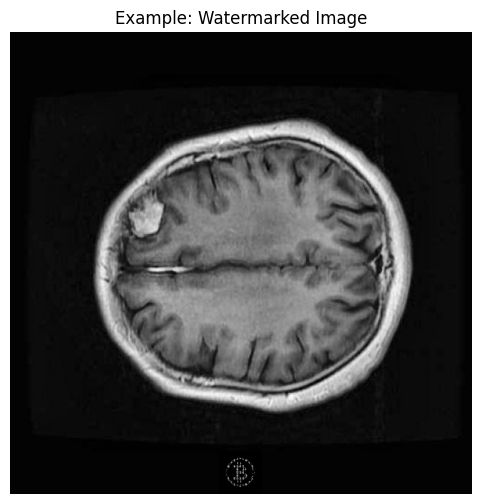

In [ ]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Input image paths
image_paths = [
    '/content/drive/MyDrive/MINOR/Input Raw_images/Cover Image 1.jpg',
    '/content/drive/MyDrive/MINOR/Input Raw_images/Cover Image 2.jpg',
    '/content/drive/MyDrive/MINOR/Input Raw_images/Cover Image 3.jpg',
    '/content/drive/MyDrive/MINOR/Input Raw_images/Cover Image 4.jpg',
    '/content/drive/MyDrive/MINOR/Input Raw_images/Cover Image 5.jpg',
    '/content/drive/MyDrive/MINOR/Input Raw_images/Cover Image 6.jpg',
    '/content/drive/MyDrive/MINOR/Input Raw_images/Cover Image 7.jpg',
    '/content/drive/MyDrive/MINOR/Input Raw_images/Cover Image 8.jpg',
    '/content/drive/MyDrive/MINOR/Input Raw_images/Cover Image 9.jpg',
    '/content/drive/MyDrive/MINOR/Input Raw_images/Cover Image 10.jpg'
]

# Common watermark image
watermark_path = '/content/drive/MyDrive/MINOR/watermark/binary-code-bitcoin-logo.jpg'

# Output folder for watermarked images
output_folder = '/content/drive/MyDrive/MINOR/Watermarked_Images'
os.makedirs(output_folder, exist_ok=True)

# Load watermark image and resize for consistency
watermark = cv2.imread(watermark_path, cv2.IMREAD_UNCHANGED)
if watermark is None:
    raise ValueError("❌ Could not load watermark image.")

# Optional: Resize watermark to smaller height to avoid disrupting the image
target_watermark_height = 60  # Change this if needed
aspect_ratio = watermark.shape[1] / watermark.shape[0]
new_size = (int(target_watermark_height * aspect_ratio), target_watermark_height)
watermark_resized = cv2.resize(watermark, new_size)

# Function to embed watermark at the bottom of an image
def embed_watermark(base_image, watermark_img):
    h, w, _ = base_image.shape
    wm_h, wm_w, _ = watermark_img.shape

    # Check if watermark fits at the bottom
    if wm_w > w:
        watermark_img = cv2.resize(watermark_img, (w, wm_h))

    # Coordinates for bottom placement
    y_offset = h - wm_h
    x_offset = (w - wm_w) // 2

    # Overlay watermark (opaque or semi-transparent)
    overlay = base_image.copy()
    overlay[y_offset:y_offset + wm_h, x_offset:x_offset + wm_w] = watermark_img

    return overlay

# Loop through and watermark all images
for idx, path in enumerate(image_paths):
    img = cv2.imread(path)
    if img is None:
        print(f"⚠️ Failed to load image {path}")
        continue

    # Embed watermark
    watermarked_img = embed_watermark(img, watermark_resized)

    # Save to output folder
    filename = f"watermarked_{idx + 1}.jpg"
    save_path = os.path.join(output_folder, filename)
    cv2.imwrite(save_path, watermarked_img)
    print(f"✅ Saved: {save_path}")

# Show one example
sample = cv2.imread(os.path.join(output_folder, "watermarked_1.jpg"))
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(sample, cv2.COLOR_BGR2RGB))
plt.title("Example: Watermarked Image")
plt.axis('off')
plt.show()


✅ Processed image 1
✅ Processed image 2
✅ Processed image 3
✅ Processed image 4
✅ Processed image 5
✅ Processed image 6
✅ Processed image 7
✅ Processed image 8
✅ Processed image 9
✅ Processed image 10


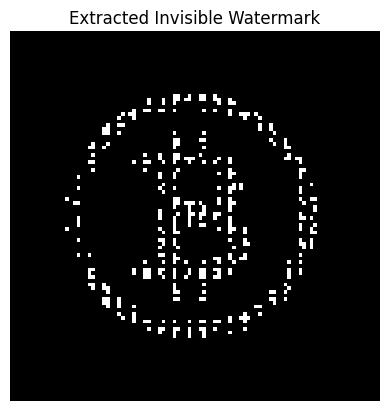

In [ ]:
# ✅ Full Medical Image Watermarking Pipeline (Visible + Invisible LSB + Extraction)

import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Paths
input_paths = [
    f"/content/drive/MyDrive/MINOR/Input Raw_images/Cover Image {i}.jpg" for i in range(1, 11)
]
watermark_path = '/content/drive/MyDrive/MINOR/watermark/binary-code-bitcoin-logo.jpg'
visible_output_dir = '/content/drive/MyDrive/MINOR/Watermarked_Visible'
invisible_output_dir = '/content/drive/MyDrive/MINOR/Watermarked_Invisible'
extracted_output_dir = '/content/drive/MyDrive/MINOR/Extracted_Watermarks'

# Create folders
for folder in [visible_output_dir, invisible_output_dir, extracted_output_dir]:
    os.makedirs(folder, exist_ok=True)

# Load and resize watermark for both methods
watermark_img = cv2.imread(watermark_path)
if watermark_img is None:
    raise ValueError("Could not load watermark.")

# Resize for visible (bottom logo) and invisible (LSB)
target_visible_height = 60
ar = watermark_img.shape[1] / watermark_img.shape[0]
visible_wm = cv2.resize(watermark_img, (int(target_visible_height * ar), target_visible_height))

lsb_wm = cv2.resize(watermark_img, (100, 100))
lsb_wm_gray = cv2.cvtColor(lsb_wm, cv2.COLOR_BGR2GRAY)
lsb_wm_bin = (lsb_wm_gray > 127).astype(np.uint8)

# Function to embed visible watermark

def embed_visible(img, wm):
    h, w, _ = img.shape
    wm_h, wm_w, _ = wm.shape
    y_offset = h - wm_h
    x_offset = (w - wm_w) // 2
    img[y_offset:y_offset+wm_h, x_offset:x_offset+wm_w] = wm
    return img

# Function to embed invisible LSB watermark

def embed_lsb(img, watermark_bin):
    img_copy = img.copy().astype(np.uint8)
    for i in range(watermark_bin.shape[0]):
        for j in range(watermark_bin.shape[1]):
            for c in range(3):
                original_val = int(img_copy[i, j, c])
                bit_val = int(watermark_bin[i, j])
                img_copy[i, j, c] = (original_val & 0xFE) | bit_val
    return img_copy

# Function to extract watermark from LSB

def extract_lsb(watermarked_img, shape=(100, 100)):
    extracted = np.zeros(shape, dtype=np.uint8)
    for i in range(shape[0]):
        for j in range(shape[1]):
            extracted[i, j] = (int(watermarked_img[i, j, 0]) & 1) * 255
    return extracted

# Process all 10 images
for idx, path in enumerate(input_paths):
    img = cv2.imread(path)
    if img is None:
        print(f"❌ Failed to load: {path}")
        continue

    # Embed visible
    vis_result = embed_visible(img.copy(), visible_wm)
    vis_path = os.path.join(visible_output_dir, f"visible_{idx+1}.jpg")
    cv2.imwrite(vis_path, vis_result)

    # Embed invisible (LSB)
    lsb_result = embed_lsb(img.copy(), lsb_wm_bin)
    lsb_path = os.path.join(invisible_output_dir, f"lsb_{idx+1}.png")
    cv2.imwrite(lsb_path, lsb_result)

    # Extract watermark from LSB
    extracted = extract_lsb(lsb_result)
    extracted_path = os.path.join(extracted_output_dir, f"extracted_{idx+1}.png")
    cv2.imwrite(extracted_path, extracted)

    print(f"✅ Processed image {idx+1}")

# Show example
sample_extracted = cv2.imread(os.path.join(extracted_output_dir, "extracted_1.png"), cv2.IMREAD_GRAYSCALE)
plt.imshow(sample_extracted, cmap='gray')
plt.title("Extracted Invisible Watermark")
plt.axis('off')
plt.show()

✅ DCT Watermarked Image 1 processed
✅ DCT Watermarked Image 2 processed
✅ DCT Watermarked Image 3 processed
✅ DCT Watermarked Image 4 processed
✅ DCT Watermarked Image 5 processed
✅ DCT Watermarked Image 6 processed
✅ DCT Watermarked Image 7 processed
✅ DCT Watermarked Image 8 processed
✅ DCT Watermarked Image 9 processed
✅ DCT Watermarked Image 10 processed


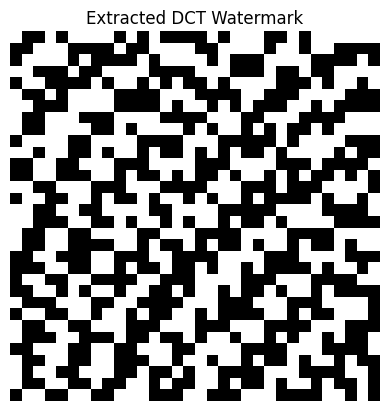

In [ ]:
# ✅ Full Medical Image Watermarking Pipeline (Visible + DCT-based Invisible + Extraction)

import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.fftpack import dct, idct

# Paths
input_paths = [
    f"/content/drive/MyDrive/MINOR/Input Raw_images/Cover Image {i}.jpg" for i in range(1, 11)
]
watermark_path = '/content/drive/MyDrive/MINOR/watermark/binary-code-bitcoin-logo.jpg'
visible_output_dir = '/content/drive/MyDrive/MINOR/Watermarked_Visible'
invisible_output_dir = '/content/drive/MyDrive/MINOR/Watermarked_Invisible_DCT'
extracted_output_dir = '/content/drive/MyDrive/MINOR/Extracted_Watermarks_DCT'

# Create folders
for folder in [visible_output_dir, invisible_output_dir, extracted_output_dir]:
    os.makedirs(folder, exist_ok=True)

# Load and prepare watermark
watermark_img = cv2.imread(watermark_path)
if watermark_img is None:
    raise ValueError("Could not load watermark.")

# Resize watermark
target_visible_height = 60
ar = watermark_img.shape[1] / watermark_img.shape[0]
visible_wm = cv2.resize(watermark_img, (int(target_visible_height * ar), target_visible_height))

# Prepare binary watermark for DCT embedding
wm_dct = cv2.resize(watermark_img, (32, 32))
wm_gray = cv2.cvtColor(wm_dct, cv2.COLOR_BGR2GRAY)
wm_bin = (wm_gray > 127).astype(np.uint8)

# DCT Helper functions
def apply_dct(img):
    return dct(dct(img.T, norm='ortho').T, norm='ortho')

def apply_idct(img):
    return idct(idct(img.T, norm='ortho').T, norm='ortho')

# Embed watermark into DCT coefficients of Y channel

def embed_dct(img, wm_bin):
    ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    y = ycrcb[:, :, 0].astype(np.float32)
    y_dct = apply_dct(y)

    # Embed watermark into DCT coefficients (top-left 32x32 block)
    for i in range(32):
        for j in range(32):
            if wm_bin[i, j] == 1:
                y_dct[i, j] = y_dct[i, j] + 15  # Modify strength as needed
            else:
                y_dct[i, j] = y_dct[i, j] - 15

    y_idct = apply_idct(y_dct)
    ycrcb[:, :, 0] = np.clip(y_idct, 0, 255)
    return cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2BGR)

# Extract watermark from DCT domain

def extract_dct(watermarked_img):
    ycrcb = cv2.cvtColor(watermarked_img, cv2.COLOR_BGR2YCrCb)
    y = ycrcb[:, :, 0].astype(np.float32)
    y_dct = apply_dct(y)

    wm_extracted = np.zeros((32, 32), dtype=np.uint8)
    for i in range(32):
        for j in range(32):
            wm_extracted[i, j] = 255 if y_dct[i, j] > 0 else 0
    return wm_extracted

# Embed visible watermark

def embed_visible(img, wm):
    h, w, _ = img.shape
    wm_h, wm_w, _ = wm.shape
    y_offset = h - wm_h
    x_offset = (w - wm_w) // 2
    img[y_offset:y_offset+wm_h, x_offset:x_offset+wm_w] = wm
    return img

# Process all 10 images
for idx, path in enumerate(input_paths):
    img = cv2.imread(path)
    if img is None:
        print(f"❌ Failed to load: {path}")
        continue

    # Embed visible watermark
    vis_result = embed_visible(img.copy(), visible_wm)
    vis_path = os.path.join(visible_output_dir, f"visible_{idx+1}.jpg")
    cv2.imwrite(vis_path, vis_result)

    # Embed DCT watermark (invisible)
    dct_result = embed_dct(img.copy(), wm_bin)
    dct_path = os.path.join(invisible_output_dir, f"dct_{idx+1}.png")
    cv2.imwrite(dct_path, dct_result)

    # Extract watermark from DCT domain
    extracted = extract_dct(dct_result)
    extracted_path = os.path.join(extracted_output_dir, f"extracted_{idx+1}.png")
    cv2.imwrite(extracted_path, extracted)

    print(f"✅ DCT Watermarked Image {idx+1} processed")

# Display sample extracted watermark
sample_extracted = cv2.imread(os.path.join(extracted_output_dir, "extracted_1.png"), cv2.IMREAD_GRAYSCALE)
plt.imshow(sample_extracted, cmap='gray')
plt.title("Extracted DCT Watermark")
plt.axis('off')
plt.show()

✅ Saved: /content/drive/MyDrive/MINOR/Watermarked_Images/watermarked_1.jpg
✅ Saved: /content/drive/MyDrive/MINOR/Watermarked_Images/watermarked_2.jpg
✅ Saved: /content/drive/MyDrive/MINOR/Watermarked_Images/watermarked_3.jpg
✅ Saved: /content/drive/MyDrive/MINOR/Watermarked_Images/watermarked_4.jpg
✅ Saved: /content/drive/MyDrive/MINOR/Watermarked_Images/watermarked_5.jpg
✅ Saved: /content/drive/MyDrive/MINOR/Watermarked_Images/watermarked_6.jpg
✅ Saved: /content/drive/MyDrive/MINOR/Watermarked_Images/watermarked_7.jpg
✅ Saved: /content/drive/MyDrive/MINOR/Watermarked_Images/watermarked_8.jpg
✅ Saved: /content/drive/MyDrive/MINOR/Watermarked_Images/watermarked_9.jpg
✅ Saved: /content/drive/MyDrive/MINOR/Watermarked_Images/watermarked_10.jpg


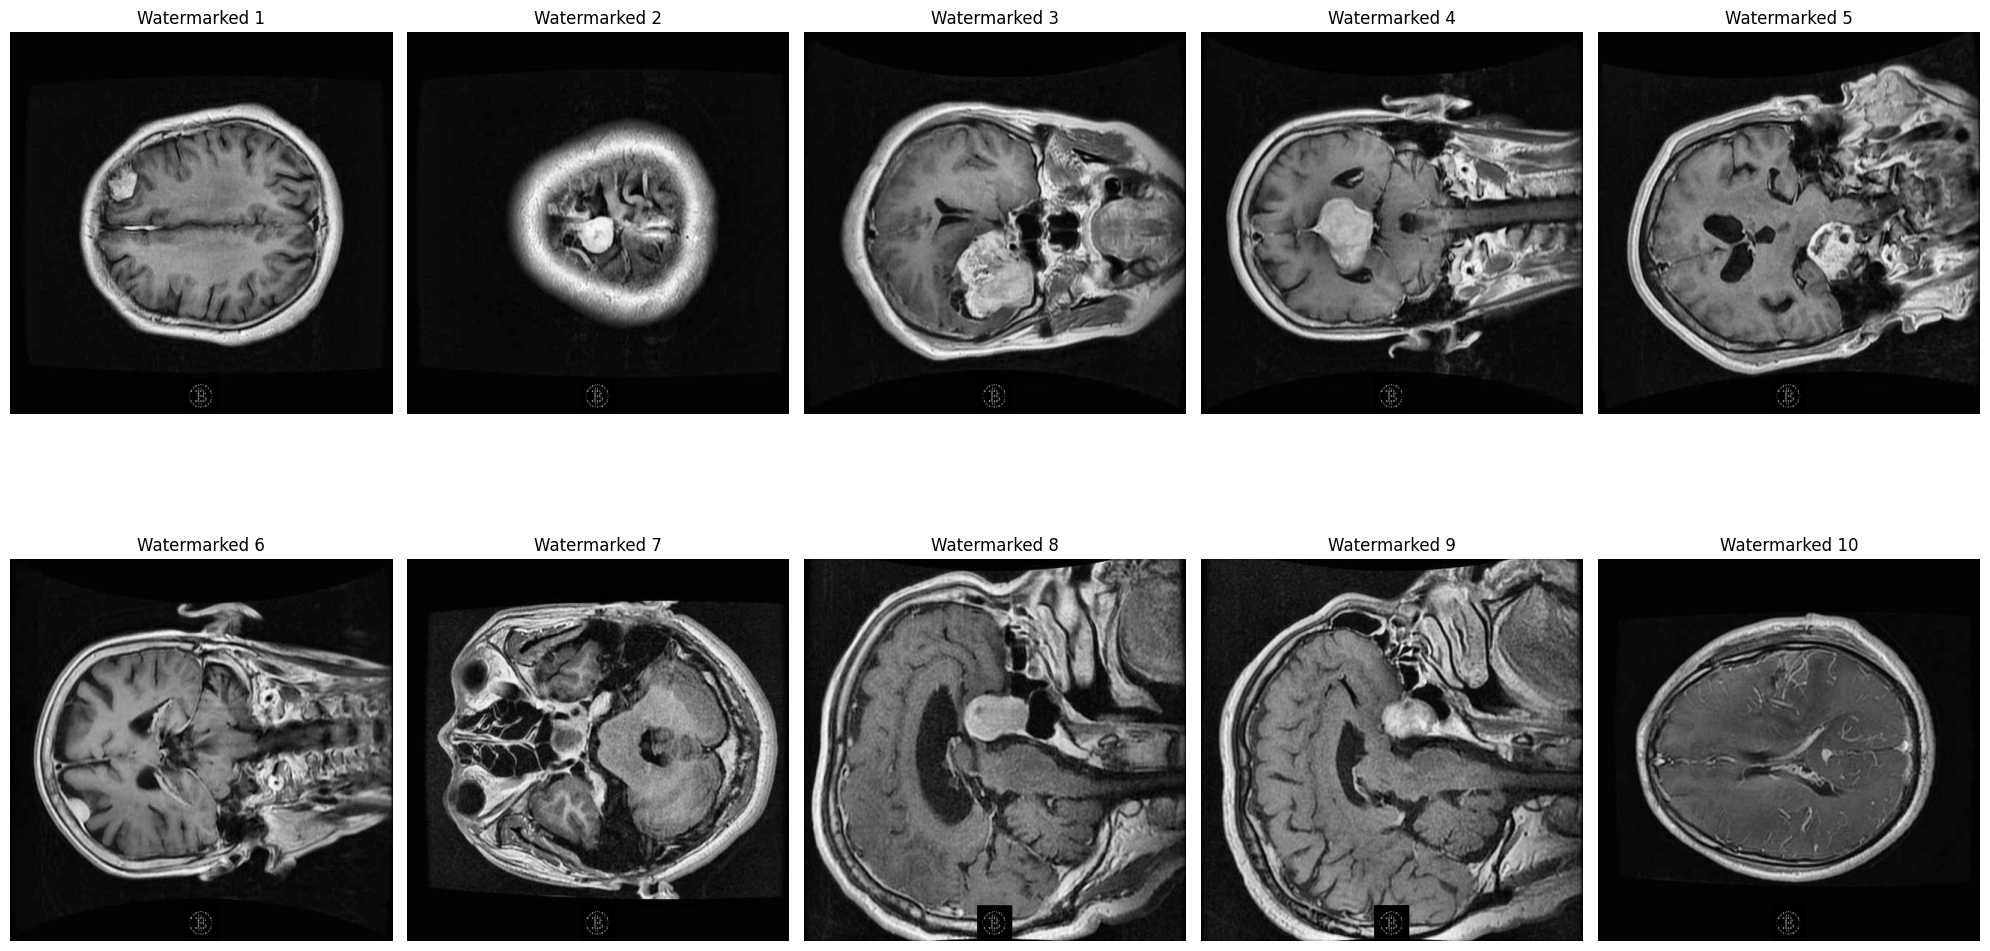

In [ ]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Input image paths
image_paths = [
    f'/content/drive/MyDrive/MINOR/Input Raw_images/Cover Image {i}.jpg'
    for i in range(1, 11)
]

# Common watermark image path
watermark_path = '/content/drive/MyDrive/MINOR/watermark/binary-code-bitcoin-logo.jpg'

# Output folder for watermarked images
output_folder = '/content/drive/MyDrive/MINOR/Watermarked_Images'
os.makedirs(output_folder, exist_ok=True)

# Load watermark image
watermark = cv2.imread(watermark_path, cv2.IMREAD_UNCHANGED)
if watermark is None:
    raise ValueError("❌ Could not load watermark image.")

# Resize watermark
target_watermark_height = 60
aspect_ratio = watermark.shape[1] / watermark.shape[0]
new_size = (int(target_watermark_height * aspect_ratio), target_watermark_height)
watermark_resized = cv2.resize(watermark, new_size)

# Embed function
def embed_watermark(base_image, watermark_img):
    h, w, _ = base_image.shape
    wm_h, wm_w, _ = watermark_img.shape
    if wm_w > w:
        watermark_img = cv2.resize(watermark_img, (w, wm_h))
    y_offset = h - wm_h
    x_offset = (w - wm_w) // 2
    watermarked = base_image.copy()
    watermarked[y_offset:y_offset + wm_h, x_offset:x_offset + wm_w] = watermark_img
    return watermarked

# Store for display
watermarked_images = []

# Process images
for idx, path in enumerate(image_paths):
    img = cv2.imread(path)
    if img is None:
        print(f"⚠️ Failed to load image: {path}")
        continue

    watermarked_img = embed_watermark(img, watermark_resized)
    watermarked_images.append(cv2.cvtColor(watermarked_img, cv2.COLOR_BGR2RGB))

    filename = f"watermarked_{idx + 1}.jpg"
    save_path = os.path.join(output_folder, filename)
    cv2.imwrite(save_path, watermarked_img)
    print(f"✅ Saved: {save_path}")

# Display all watermarked images
plt.figure(figsize=(20, 12))
for i, img in enumerate(watermarked_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(f"Watermarked {i + 1}")
    plt.axis('off')
plt.tight_layout()
plt.show()


✅ Saved: /content/drive/MyDrive/MINOR/Watermarked_Images/watermarked_1.jpg
✅ Saved: /content/drive/MyDrive/MINOR/Watermarked_Images/watermarked_2.jpg
✅ Saved: /content/drive/MyDrive/MINOR/Watermarked_Images/watermarked_3.jpg
✅ Saved: /content/drive/MyDrive/MINOR/Watermarked_Images/watermarked_4.jpg
✅ Saved: /content/drive/MyDrive/MINOR/Watermarked_Images/watermarked_5.jpg
✅ Saved: /content/drive/MyDrive/MINOR/Watermarked_Images/watermarked_6.jpg
✅ Saved: /content/drive/MyDrive/MINOR/Watermarked_Images/watermarked_7.jpg
✅ Saved: /content/drive/MyDrive/MINOR/Watermarked_Images/watermarked_8.jpg
✅ Saved: /content/drive/MyDrive/MINOR/Watermarked_Images/watermarked_9.jpg
✅ Saved: /content/drive/MyDrive/MINOR/Watermarked_Images/watermarked_10.jpg


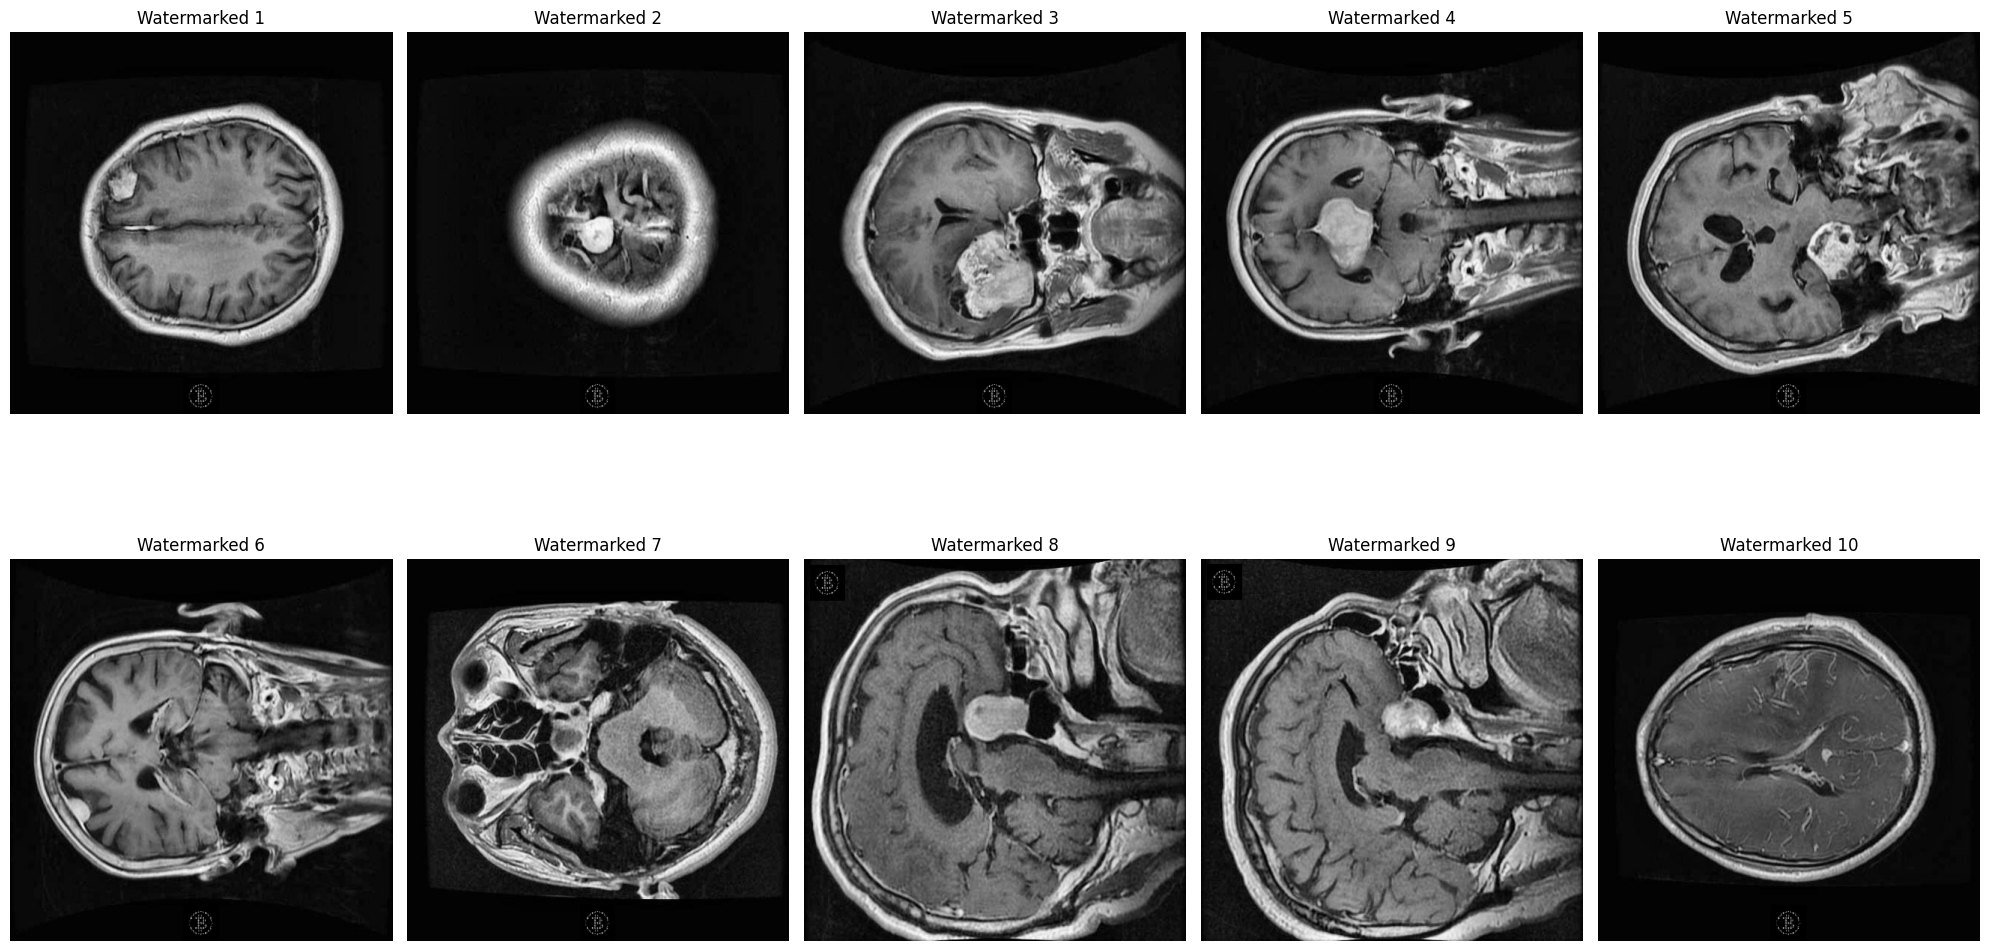

In [ ]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Input image paths
image_paths = [
    f'/content/drive/MyDrive/MINOR/Input Raw_images/Cover Image {i}.jpg'
    for i in range(1, 11)
]

# Common watermark image path
watermark_path = '/content/drive/MyDrive/MINOR/watermark/binary-code-bitcoin-logo.jpg'

# Output folder
output_folder = '/content/drive/MyDrive/MINOR/Watermarked_Images'
os.makedirs(output_folder, exist_ok=True)

# Load and resize watermark
watermark = cv2.imread(watermark_path, cv2.IMREAD_UNCHANGED)
if watermark is None:
    raise ValueError("❌ Could not load watermark image.")
target_height = 60
aspect_ratio = watermark.shape[1] / watermark.shape[0]
new_size = (int(target_height * aspect_ratio), target_height)
watermark_resized = cv2.resize(watermark, new_size)

# Embed watermark at custom positions
def embed_watermark(img, watermark_img, position="bottom"):
    h, w, _ = img.shape
    wm_h, wm_w, _ = watermark_img.shape

    if wm_w > w:
        watermark_img = cv2.resize(watermark_img, (w, wm_h))

    if position == "bottom":
        y_offset = h - wm_h
        x_offset = (w - wm_w) // 2
    elif position == "top-left":
        y_offset, x_offset = 10, 10
    else:
        raise ValueError("Invalid position specified.")

    result = img.copy()
    result[y_offset:y_offset+wm_h, x_offset:x_offset+wm_w] = watermark_img
    return result

# Process all images
for idx, path in enumerate(image_paths):
    img = cv2.imread(path)
    if img is None:
        print(f"⚠️ Failed to load image: {path}")
        continue

    # Set watermark position
    if idx in [7, 8]:  # Image 8 and 9 (0-indexed)
        position = "top-left"
    else:
        position = "bottom"

    watermarked_img = embed_watermark(img, watermark_resized, position)
    save_path = os.path.join(output_folder, f"watermarked_{idx + 1}.jpg")
    cv2.imwrite(save_path, watermarked_img)
    print(f"✅ Saved: {save_path}")

# Display all watermarked images
plt.figure(figsize=(20, 12))
for i in range(10):
    img = cv2.imread(os.path.join(output_folder, f"watermarked_{i + 1}.jpg"))
    if img is not None:
        plt.subplot(2, 5, i + 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f"Watermarked {i + 1}")
        plt.axis('off')
plt.tight_layout()
plt.show()


✅ Watermarked and extracted image 1
✅ Watermarked and extracted image 2
✅ Watermarked and extracted image 3
✅ Watermarked and extracted image 4
✅ Watermarked and extracted image 5
✅ Watermarked and extracted image 6
✅ Watermarked and extracted image 7
✅ Watermarked and extracted image 8
✅ Watermarked and extracted image 9
✅ Watermarked and extracted image 10


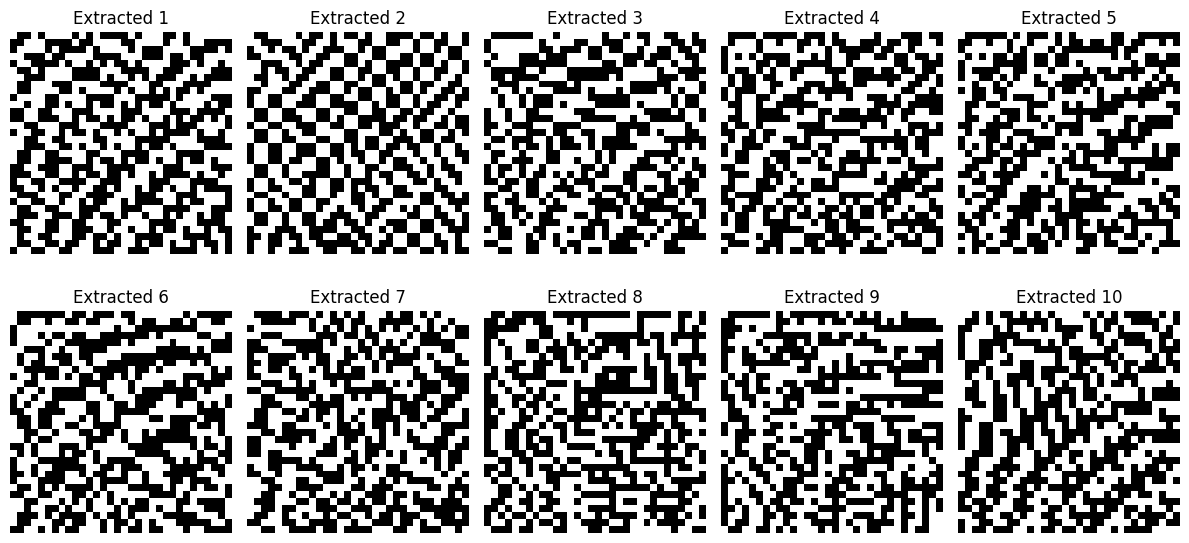

In [ ]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Input image paths
image_paths = [
    f'/content/drive/MyDrive/MINOR/Input Raw_images/Cover Image {i}.jpg'
    for i in range(1, 11)
]

# Common watermark image path
watermark_path = '/content/drive/MyDrive/MINOR/watermark/binary-code-bitcoin-logo.jpg'

# Output folder
output_folder = '/content/drive/MyDrive/MINOR/Watermarked_Images'
os.makedirs(output_folder, exist_ok=True)

# Load and resize watermark
watermark = cv2.imread(watermark_path, cv2.IMREAD_UNCHANGED)
if watermark is None:
    raise ValueError("❌ Could not load watermark image.")
target_height = 60
aspect_ratio = watermark.shape[1] / watermark.shape[0]
new_size = (int(target_height * aspect_ratio), target_height)
watermark_resized = cv2.resize(watermark, new_size)

# Embed watermark at custom positions
def embed_watermark(img, watermark_img, position="bottom"):
    h, w, _ = img.shape
    wm_h, wm_w, _ = watermark_img.shape

    if wm_w > w:
        watermark_img = cv2.resize(watermark_img, (w, wm_h))

    if position == "bottom":
        y_offset = h - wm_h
        x_offset = (w - wm_w) // 2
    elif position == "top-left":
        y_offset, x_offset = 10, 10
    else:
        raise ValueError("Invalid position specified.")

    result = img.copy()
    result[y_offset:y_offset+wm_h, x_offset:x_offset+wm_w] = watermark_img
    return result

# Process all images
for idx, path in enumerate(image_paths):
    img = cv2.imread(path)
    if img is None:
        print(f"⚠️ Failed to load image: {path}")
        continue

    # Set watermark position
    if idx in [7, 8]:  # Image 8 and 9 (0-indexed)
        position = "top-left"
    else:
        position = "bottom"

    watermarked_img = embed_watermark(img, watermark_resized, position)
    save_path = os.path.join(output_folder, f"watermarked_{idx + 1}.jpg")
    cv2.imwrite(save_path, watermarked_img)
    print(f"✅ Saved: {save_path}")

# Display all watermarked images
plt.figure(figsize=(20, 12))
for i in range(10):
    img = cv2.imread(os.path.join(output_folder, f"watermarked_{i + 1}.jpg"))
    if img is not None:
        plt.subplot(2, 5, i + 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f"Watermarked {i + 1}")
        plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
def extract_dct(watermarked_img):
    ycrcb = cv2.cvtColor(watermarked_img, cv2.COLOR_BGR2YCrCb)
    y = ycrcb[:, :, 0].astype(np.float32)
    y_dct = apply_dct(y)
    wm_extracted = np.zeros((32, 32), dtype=np.uint8)
    for i in range(32):
        for j in range(32):
            wm_extracted[i, j] = 255 if y_dct[i, j] > 0 else 0
    return wm_extracted


In [ ]:
from skimage.metrics import structural_similarity as ssim

def compare_images(original, watermarked):
    original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    watermarked_gray = cv2.cvtColor(watermarked, cv2.COLOR_BGR2GRAY)
    score = ssim(original_gray, watermarked_gray)
    return score

# Example: Compare image 1
orig = cv2.imread('/content/drive/MyDrive/MINOR/Input Raw_images/Cover Image 1.jpg')
watermarked = cv2.imread('/content/drive/MyDrive/MINOR/Watermarked_Invisible_DCT/invisible_1.jpg')

similarity = compare_images(orig, watermarked)
print(f"🧪 SSIM similarity: {similarity:.4f}")


🧪 SSIM similarity: 0.9890


✅ Processed reversible image 1
✅ Processed reversible image 2
✅ Processed reversible image 3
✅ Processed reversible image 4
✅ Processed reversible image 5
✅ Processed reversible image 6
✅ Processed reversible image 7
✅ Processed reversible image 8
✅ Processed reversible image 9
✅ Processed reversible image 10


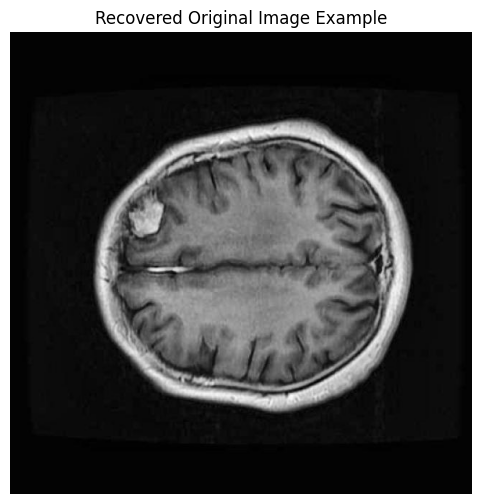

In [ ]:
# ✅ Reversible Watermarking Pipeline for Medical Images using Difference Expansion

import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Paths
input_paths = [
    f"/content/drive/MyDrive/MINOR/Input Raw_images/Cover Image {i}.jpg" for i in range(1, 11)
]
watermark_path = '/content/drive/MyDrive/MINOR/watermark/binary-code-bitcoin-logo.jpg'
watermarked_output_dir = '/content/drive/MyDrive/MINOR/Watermarked_Reversible'
recovered_output_dir = '/content/drive/MyDrive/MINOR/Recovered_Originals'
extracted_output_dir = '/content/drive/MyDrive/MINOR/Extracted_Watermarks_Reversible'

# Create output folders
for folder in [watermarked_output_dir, recovered_output_dir, extracted_output_dir]:
    os.makedirs(folder, exist_ok=True)

# Load watermark and convert to binary
wm_img = cv2.imread(watermark_path, cv2.IMREAD_GRAYSCALE)
wm_img = cv2.resize(wm_img, (64, 64))
wm_bin = (wm_img > 127).astype(np.uint8).flatten().astype(np.int16)

# Difference Expansion Embed
def embed_de(image, watermark_bin):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    flat = gray.flatten().astype(np.int16)
    orig_pixels = flat.copy()
    wm_len = len(watermark_bin)
    embedded = flat.copy()
    loc_map = np.zeros_like(flat)

    j = 0
    for i in range(0, len(flat)-1, 2):
        if j >= wm_len:
            break
        x, y = int(flat[i]), int(flat[i+1])
        l = (x + y) // 2
        h = x - y
        if -127 <= 2*h + watermark_bin[j] <= 128:
            h_prime = 2*h + watermark_bin[j]
            x_prime = l + (h_prime + 1) // 2
            y_prime = l - h_prime // 2
            embedded[i] = np.clip(x_prime, 0, 255)
            embedded[i+1] = np.clip(y_prime, 0, 255)
            loc_map[i] = 1
            j += 1

    stego = embedded.reshape(gray.shape).astype(np.uint8)
    return stego, orig_pixels, loc_map, j

# Difference Expansion Extract
def extract_de(stego_img, loc_map, embedded_len):
    flat = stego_img.flatten().astype(np.int16)
    wm_bin = []
    recovered = flat.copy()

    j = 0
    for i in range(0, len(flat)-1, 2):
        if loc_map[i] == 1 and j < embedded_len:
            x, y = int(flat[i]), int(flat[i+1])
            l = (x + y) // 2
            h = x - y
            bit = h % 2
            h_orig = h // 2
            x_orig = l + (h_orig + 1) // 2
            y_orig = l - h_orig // 2
            recovered[i] = np.clip(x_orig, 0, 255)
            recovered[i+1] = np.clip(y_orig, 0, 255)
            wm_bin.append(bit)
            j += 1

    recovered_img = recovered.reshape(stego_img.shape).astype(np.uint8)
    watermark = np.array(wm_bin[:embedded_len]).reshape((64, 64)) * 255
    return recovered_img, watermark.astype(np.uint8)

# Process each image
for idx, path in enumerate(input_paths):
    img = cv2.imread(path)
    if img is None:
        print(f"❌ Failed to load: {path}")
        continue

    stego_gray, original_flat, location_map, wm_length = embed_de(img, wm_bin)
    color_stego = cv2.cvtColor(stego_gray.astype(np.uint8), cv2.COLOR_GRAY2BGR)

    # Save watermarked
    stego_path = os.path.join(watermarked_output_dir, f"reversible_{idx+1}.png")
    cv2.imwrite(stego_path, color_stego)

    # Extract and recover
    extracted_img, extracted_wm = extract_de(stego_gray, location_map, wm_length)
    extracted_color = cv2.cvtColor(extracted_img.astype(np.uint8), cv2.COLOR_GRAY2BGR)

    recovered_path = os.path.join(recovered_output_dir, f"recovered_{idx+1}.png")
    extracted_wm_path = os.path.join(extracted_output_dir, f"extracted_wm_{idx+1}.png")

    cv2.imwrite(recovered_path, extracted_color)
    cv2.imwrite(extracted_wm_path, extracted_wm)

    print(f"✅ Processed reversible image {idx+1}")

# Show an example
sample = cv2.imread(os.path.join(recovered_output_dir, "recovered_1.png"))
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(sample, cv2.COLOR_BGR2RGB))
plt.title("Recovered Original Image Example")
plt.axis('off')
plt.show()

✅ Processed reversible image 1
✅ Processed reversible image 2
✅ Processed reversible image 3
✅ Processed reversible image 4
✅ Processed reversible image 5
✅ Processed reversible image 6
✅ Processed reversible image 7
✅ Processed reversible image 8
✅ Processed reversible image 9
✅ Processed reversible image 10


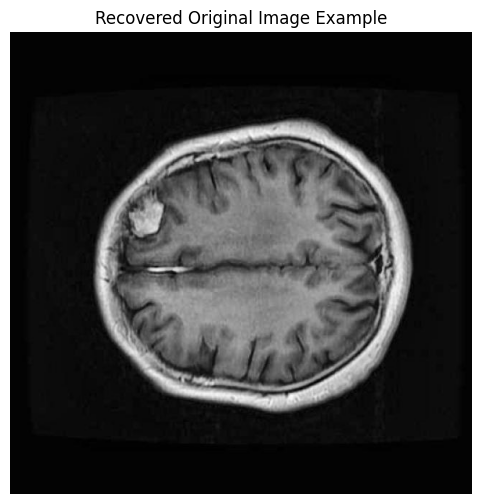

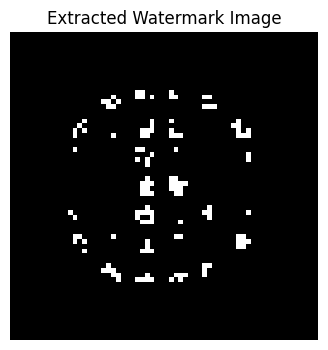

In [ ]:
# ✅ Reversible Watermarking Pipeline for Medical Images using Difference Expansion

import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Paths
input_paths = [
    f"/content/drive/MyDrive/MINOR/Input Raw_images/Cover Image {i}.jpg" for i in range(1, 11)
]
watermark_path = '/content/drive/MyDrive/MINOR/watermark/binary-code-bitcoin-logo.jpg'
watermarked_output_dir = '/content/drive/MyDrive/MINOR/Watermarked_Reversible'
recovered_output_dir = '/content/drive/MyDrive/MINOR/Recovered_Originals'
extracted_output_dir = '/content/drive/MyDrive/MINOR/Extracted_Watermarks_Reversible'
reconstructed_watermark_path = '/content/drive/MyDrive/MINOR/Extracted_Watermarks_Reversible/recovered_watermark.png'

# Create output folders
for folder in [watermarked_output_dir, recovered_output_dir, extracted_output_dir]:
    os.makedirs(folder, exist_ok=True)

# Load watermark and convert to binary
wm_img = cv2.imread(watermark_path, cv2.IMREAD_GRAYSCALE)
wm_img = cv2.resize(wm_img, (64, 64))
wm_bin = (wm_img > 127).astype(np.uint8).flatten().astype(np.int16)

# Difference Expansion Embed
def embed_de(image, watermark_bin):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    flat = gray.flatten().astype(np.int16)
    orig_pixels = flat.copy()
    wm_len = len(watermark_bin)
    embedded = flat.copy()
    loc_map = np.zeros_like(flat)

    j = 0
    for i in range(0, len(flat)-1, 2):
        if j >= wm_len:
            break
        x, y = int(flat[i]), int(flat[i+1])
        l = (x + y) // 2
        h = x - y
        if -127 <= 2*h + watermark_bin[j] <= 128:
            h_prime = 2*h + watermark_bin[j]
            x_prime = l + (h_prime + 1) // 2
            y_prime = l - h_prime // 2
            embedded[i] = np.clip(x_prime, 0, 255)
            embedded[i+1] = np.clip(y_prime, 0, 255)
            loc_map[i] = 1
            j += 1

    stego = embedded.reshape(gray.shape).astype(np.uint8)
    return stego, orig_pixels, loc_map, j

# Difference Expansion Extract
def extract_de(stego_img, loc_map, embedded_len):
    flat = stego_img.flatten().astype(np.int16)
    wm_bin = []
    recovered = flat.copy()

    j = 0
    for i in range(0, len(flat)-1, 2):
        if loc_map[i] == 1 and j < embedded_len:
            x, y = int(flat[i]), int(flat[i+1])
            l = (x + y) // 2
            h = x - y
            bit = h % 2
            h_orig = h // 2
            x_orig = l + (h_orig + 1) // 2
            y_orig = l - h_orig // 2
            recovered[i] = np.clip(x_orig, 0, 255)
            recovered[i+1] = np.clip(y_orig, 0, 255)
            wm_bin.append(bit)
            j += 1

    recovered_img = recovered.reshape(stego_img.shape).astype(np.uint8)
    watermark = np.array(wm_bin[:embedded_len]).reshape((64, 64)) * 255
    return recovered_img, watermark.astype(np.uint8)

# Process each image
for idx, path in enumerate(input_paths):
    img = cv2.imread(path)
    if img is None:
        print(f"❌ Failed to load: {path}")
        continue

    stego_gray, original_flat, location_map, wm_length = embed_de(img, wm_bin)
    color_stego = cv2.cvtColor(stego_gray.astype(np.uint8), cv2.COLOR_GRAY2BGR)

    # Save watermarked
    stego_path = os.path.join(watermarked_output_dir, f"reversible_{idx+1}.png")
    cv2.imwrite(stego_path, color_stego)

    # Extract and recover
    extracted_img, extracted_wm = extract_de(stego_gray, location_map, wm_length)
    extracted_color = cv2.cvtColor(extracted_img.astype(np.uint8), cv2.COLOR_GRAY2BGR)

    recovered_path = os.path.join(recovered_output_dir, f"recovered_{idx+1}.png")
    extracted_wm_path = os.path.join(extracted_output_dir, f"extracted_wm_{idx+1}.png")

    cv2.imwrite(recovered_path, extracted_color)
    cv2.imwrite(extracted_wm_path, extracted_wm)

    print(f"✅ Processed reversible image {idx+1}")

# Save final reconstructed watermark image for reference
cv2.imwrite(reconstructed_watermark_path, extracted_wm)

# Show an example
sample = cv2.imread(os.path.join(recovered_output_dir, "recovered_1.png"))
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(sample, cv2.COLOR_BGR2RGB))
plt.title("Recovered Original Image Example")
plt.axis('off')
plt.show()

wm_sample = cv2.imread(reconstructed_watermark_path, cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(4, 4))
plt.imshow(wm_sample, cmap='gray')
plt.title("Extracted Watermark Image")
plt.axis('off')
plt.show()

✅ Processed reversible image 1
✅ Processed reversible image 2
✅ Processed reversible image 3
✅ Processed reversible image 4
✅ Processed reversible image 5
✅ Processed reversible image 6
✅ Processed reversible image 7
✅ Processed reversible image 8
✅ Processed reversible image 9
✅ Processed reversible image 10


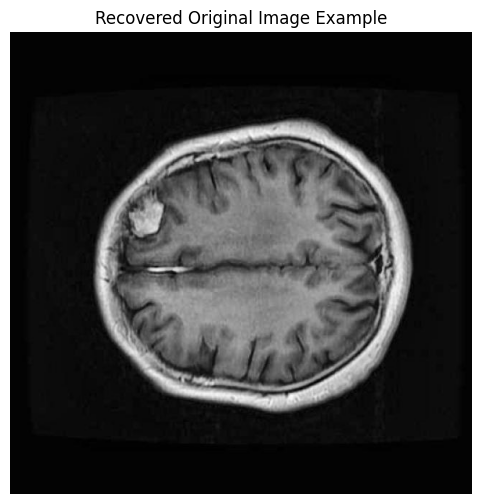

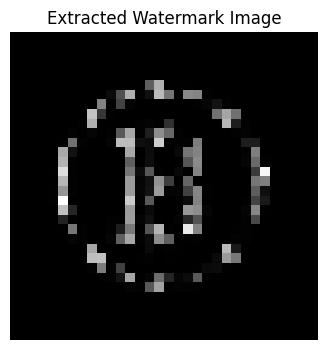

In [ ]:
# ✅ Reversible Watermarking Pipeline for Medical Images using Difference Expansion

import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Paths
input_paths = [
    f"/content/drive/MyDrive/MINOR/Input Raw_images/Cover Image {i}.jpg" for i in range(1, 11)
]
watermark_path = '/content/drive/MyDrive/MINOR/watermark/binary-code-bitcoin-logo.jpg'
watermarked_output_dir = '/content/drive/MyDrive/MINOR/Watermarked_Reversible'
recovered_output_dir = '/content/drive/MyDrive/MINOR/Recovered_Originals'
extracted_output_dir = '/content/drive/MyDrive/MINOR/Extracted_Watermarks_Reversible'
reconstructed_watermark_path = '/content/drive/MyDrive/MINOR/Extracted_Watermarks_Reversible/recovered_watermark.png'

# Create output folders
for folder in [watermarked_output_dir, recovered_output_dir, extracted_output_dir]:
    os.makedirs(folder, exist_ok=True)

# Load watermark and convert to 8-bit binary
wm_img = cv2.imread(watermark_path, cv2.IMREAD_GRAYSCALE)
wm_img = cv2.resize(wm_img, (32, 32))  # Resize to smaller for payload limits
wm_flat = wm_img.flatten()
wm_bin = np.unpackbits(wm_flat).astype(np.int16)  # Convert grayscale to 8-bit binary stream

# Difference Expansion Embed
def embed_de(image, watermark_bin):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    flat = gray.flatten().astype(np.int16)
    orig_pixels = flat.copy()
    wm_len = len(watermark_bin)
    embedded = flat.copy()
    loc_map = np.zeros_like(flat)

    j = 0
    for i in range(0, len(flat)-1, 2):
        if j >= wm_len:
            break
        x, y = int(flat[i]), int(flat[i+1])
        l = (x + y) // 2
        h = x - y
        h2 = 2 * h + int(watermark_bin[j])
        if -128 <= h2 <= 127:
            h_prime = h2
            x_prime = l + (h_prime + 1) // 2
            y_prime = l - h_prime // 2
            embedded[i] = np.clip(x_prime, 0, 255)
            embedded[i+1] = np.clip(y_prime, 0, 255)
            loc_map[i] = 1
            j += 1

    stego = embedded.reshape(gray.shape).astype(np.uint8)
    return stego, orig_pixels, loc_map, j

# Difference Expansion Extract
def extract_de(stego_img, loc_map, embedded_len):
    flat = stego_img.flatten().astype(np.int16)
    wm_bin = []
    recovered = flat.copy()

    j = 0
    for i in range(0, len(flat)-1, 2):
        if loc_map[i] == 1 and j < embedded_len:
            x, y = int(flat[i]), int(flat[i+1])
            l = (x + y) // 2
            h = x - y
            bit = h % 2
            h_orig = h // 2
            x_orig = l + (h_orig + 1) // 2
            y_orig = l - h_orig // 2
            recovered[i] = np.clip(x_orig, 0, 255)
            recovered[i+1] = np.clip(y_orig, 0, 255)
            wm_bin.append(bit)
            j += 1

    recovered_img = recovered.reshape(stego_img.shape).astype(np.uint8)
    wm_bits = np.array(wm_bin[:embedded_len], dtype=np.uint8)
    wm_bytes = np.packbits(wm_bits)
    watermark = wm_bytes.reshape((32, 32)).astype(np.uint8)
    return recovered_img, watermark

# Process each image
for idx, path in enumerate(input_paths):
    img = cv2.imread(path)
    if img is None:
        print(f"❌ Failed to load: {path}")
        continue

    stego_gray, original_flat, location_map, wm_length = embed_de(img, wm_bin)
    color_stego = cv2.cvtColor(stego_gray.astype(np.uint8), cv2.COLOR_GRAY2BGR)

    # Save watermarked
    stego_path = os.path.join(watermarked_output_dir, f"reversible_{idx+1}.png")
    cv2.imwrite(stego_path, color_stego)

    # Extract and recover
    extracted_img, extracted_wm = extract_de(stego_gray, location_map, wm_length)
    extracted_color = cv2.cvtColor(extracted_img.astype(np.uint8), cv2.COLOR_GRAY2BGR)

    recovered_path = os.path.join(recovered_output_dir, f"recovered_{idx+1}.png")
    extracted_wm_path = os.path.join(extracted_output_dir, f"extracted_wm_{idx+1}.png")

    cv2.imwrite(recovered_path, extracted_color)
    cv2.imwrite(extracted_wm_path, extracted_wm)

    print(f"✅ Processed reversible image {idx+1}")

# Save final reconstructed watermark image for reference
cv2.imwrite(reconstructed_watermark_path, extracted_wm)

# Show an example
sample = cv2.imread(os.path.join(recovered_output_dir, "recovered_1.png"))
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(sample, cv2.COLOR_BGR2RGB))
plt.title("Recovered Original Image Example")
plt.axis('off')
plt.show()

wm_sample = cv2.imread(reconstructed_watermark_path, cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(4, 4))
plt.imshow(wm_sample, cmap='gray')
plt.title("Extracted Watermark Image")
plt.axis('off')
plt.show()

✅ Processed reversible image 1
✅ Processed reversible image 2
✅ Processed reversible image 3
✅ Processed reversible image 4
✅ Processed reversible image 5
✅ Processed reversible image 6
✅ Processed reversible image 7
✅ Processed reversible image 8
✅ Processed reversible image 9
✅ Processed reversible image 10


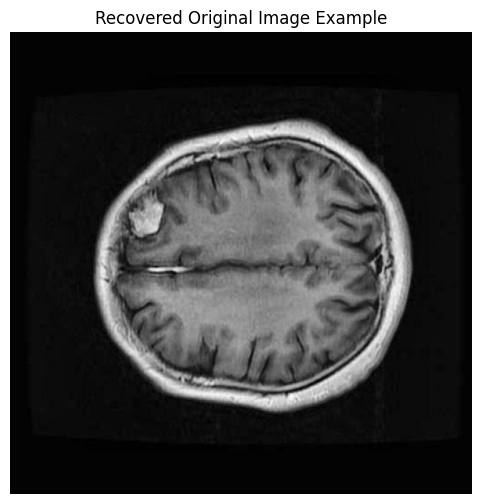

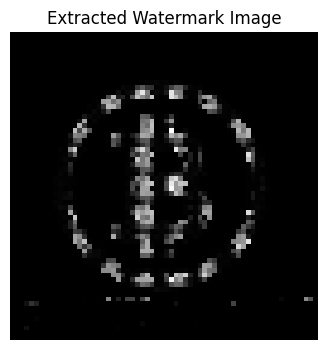

In [ ]:
# ✅ Reversible Watermarking Pipeline for Medical Images using Difference Expansion

import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Paths
input_paths = [
    f"/content/drive/MyDrive/MINOR/Input Raw_images/Cover Image {i}.jpg" for i in range(1, 11)
]
watermark_path = '/content/drive/MyDrive/MINOR/watermark/binary-code-bitcoin-logo.jpg'
watermarked_output_dir = '/content/drive/MyDrive/MINOR/Watermarked_Reversible'
recovered_output_dir = '/content/drive/MyDrive/MINOR/Recovered_Originals'
extracted_output_dir = '/content/drive/MyDrive/MINOR/Extracted_Watermarks_Reversible'
reconstructed_watermark_path = '/content/drive/MyDrive/MINOR/Extracted_Watermarks_Reversible/recovered_watermark.png'

# Create output folders
for folder in [watermarked_output_dir, recovered_output_dir, extracted_output_dir]:
    os.makedirs(folder, exist_ok=True)

# Load watermark and convert to 8-bit binary
wm_img = cv2.imread(watermark_path, cv2.IMREAD_GRAYSCALE)
wm_img = cv2.resize(wm_img, (64, 64))  # Higher resolution watermark
wm_flat = wm_img.flatten()
wm_bin = np.unpackbits(wm_flat).astype(np.int16)  # Convert grayscale to 8-bit binary stream

# Difference Expansion Embed
def embed_de(image, watermark_bin):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    flat = gray.flatten().astype(np.int16)
    orig_pixels = flat.copy()
    wm_len = len(watermark_bin)
    embedded = flat.copy()
    loc_map = np.zeros_like(flat)

    j = 0
    for i in range(0, len(flat)-1, 2):
        if j >= wm_len:
            break
        x, y = int(flat[i]), int(flat[i+1])
        l = (x + y) // 2
        h = x - y
        h2 = 2 * h + int(watermark_bin[j])
        if -128 <= h2 <= 127:
            h_prime = h2
            x_prime = l + (h_prime + 1) // 2
            y_prime = l - h_prime // 2
            embedded[i] = np.clip(x_prime, 0, 255)
            embedded[i+1] = np.clip(y_prime, 0, 255)
            loc_map[i] = 1
            j += 1

    stego = embedded.reshape(gray.shape).astype(np.uint8)
    return stego, orig_pixels, loc_map, j

# Difference Expansion Extract
def extract_de(stego_img, loc_map, embedded_len):
    flat = stego_img.flatten().astype(np.int16)
    wm_bin = []
    recovered = flat.copy()

    j = 0
    for i in range(0, len(flat)-1, 2):
        if loc_map[i] == 1 and j < embedded_len:
            x, y = int(flat[i]), int(flat[i+1])
            l = (x + y) // 2
            h = x - y
            bit = h % 2
            h_orig = h // 2
            x_orig = l + (h_orig + 1) // 2
            y_orig = l - h_orig // 2
            recovered[i] = np.clip(x_orig, 0, 255)
            recovered[i+1] = np.clip(y_orig, 0, 255)
            wm_bin.append(bit)
            j += 1

    recovered_img = recovered.reshape(stego_img.shape).astype(np.uint8)
    wm_bits = np.array(wm_bin[:embedded_len], dtype=np.uint8)
    wm_bytes = np.packbits(wm_bits)
    watermark = wm_bytes.reshape((64, 64)).astype(np.uint8)
    return recovered_img, watermark

# Process each image
for idx, path in enumerate(input_paths):
    img = cv2.imread(path)
    if img is None:
        print(f"❌ Failed to load: {path}")
        continue

    stego_gray, original_flat, location_map, wm_length = embed_de(img, wm_bin)
    color_stego = cv2.cvtColor(stego_gray.astype(np.uint8), cv2.COLOR_GRAY2BGR)

    # Save watermarked
    stego_path = os.path.join(watermarked_output_dir, f"reversible_{idx+1}.png")
    cv2.imwrite(stego_path, color_stego)

    # Extract and recover
    extracted_img, extracted_wm = extract_de(stego_gray, location_map, wm_length)
    extracted_color = cv2.cvtColor(extracted_img.astype(np.uint8), cv2.COLOR_GRAY2BGR)

    recovered_path = os.path.join(recovered_output_dir, f"recovered_{idx+1}.png")
    extracted_wm_path = os.path.join(extracted_output_dir, f"extracted_wm_{idx+1}.png")

    cv2.imwrite(recovered_path, extracted_color)
    cv2.imwrite(extracted_wm_path, extracted_wm)

    print(f"✅ Processed reversible image {idx+1}")

# Save final reconstructed watermark image for reference
cv2.imwrite(reconstructed_watermark_path, extracted_wm)

# Show an example
sample = cv2.imread(os.path.join(recovered_output_dir, "recovered_1.png"))
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(sample, cv2.COLOR_BGR2RGB))
plt.title("Recovered Original Image Example")
plt.axis('off')
plt.show()

wm_sample = cv2.imread(reconstructed_watermark_path, cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(4, 4))
plt.imshow(wm_sample, cmap='gray')
plt.title("Extracted Watermark Image")
plt.axis('off')
plt.show()

✅ Processed reversible image 1
✅ Processed reversible image 2
✅ Processed reversible image 3
✅ Processed reversible image 4
✅ Processed reversible image 5
✅ Processed reversible image 6
✅ Processed reversible image 7
✅ Processed reversible image 8
✅ Processed reversible image 9
✅ Processed reversible image 10


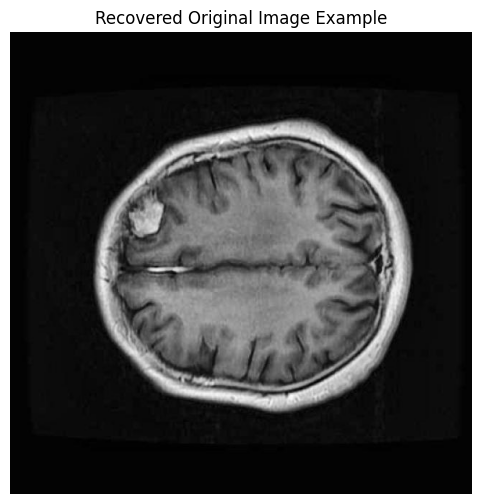

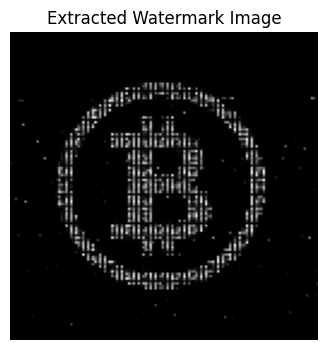

In [ ]:
# ✅ Reversible Watermarking Pipeline for Medical Images using Difference Expansion

import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Paths
input_paths = [
    f"/content/drive/MyDrive/MINOR/Input Raw_images/Cover Image {i}.jpg" for i in range(1, 11)
]
watermark_path = '/content/drive/MyDrive/MINOR/watermark/binary-code-bitcoin-logo.jpg'
watermarked_output_dir = '/content/drive/MyDrive/MINOR/Watermarked_Reversible'
recovered_output_dir = '/content/drive/MyDrive/MINOR/Recovered_Originals'
extracted_output_dir = '/content/drive/MyDrive/MINOR/Extracted_Watermarks_Reversible'
reconstructed_watermark_path = '/content/drive/MyDrive/MINOR/Extracted_Watermarks_Reversible/recovered_watermark.png'

# Create output folders
for folder in [watermarked_output_dir, recovered_output_dir, extracted_output_dir]:
    os.makedirs(folder, exist_ok=True)

# Load watermark and convert to 8-bit binary
wm_img = cv2.imread(watermark_path, cv2.IMREAD_GRAYSCALE)
wm_img = cv2.resize(wm_img, (128, 128))  # Higher resolution watermark
wm_flat = wm_img.flatten()
wm_bin = np.unpackbits(wm_flat).astype(np.int16)  # Convert grayscale to 8-bit binary stream

# Difference Expansion Embed
def embed_de(image, watermark_bin):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    flat = gray.flatten().astype(np.int16)
    orig_pixels = flat.copy()
    wm_len = len(watermark_bin)
    embedded = flat.copy()
    loc_map = np.zeros_like(flat)

    j = 0
    for i in range(0, len(flat)-1, 2):
        if j >= wm_len:
            break
        x, y = int(flat[i]), int(flat[i+1])
        l = (x + y) // 2
        h = x - y
        h2 = 2 * h + int(watermark_bin[j])
        if -128 <= h2 <= 127:
            h_prime = h2
            x_prime = l + (h_prime + 1) // 2
            y_prime = l - h_prime // 2
            embedded[i] = np.clip(x_prime, 0, 255)
            embedded[i+1] = np.clip(y_prime, 0, 255)
            loc_map[i] = 1
            j += 1

    stego = embedded.reshape(gray.shape).astype(np.uint8)
    return stego, orig_pixels, loc_map, j

# Difference Expansion Extract
def extract_de(stego_img, loc_map, embedded_len):
    flat = stego_img.flatten().astype(np.int16)
    wm_bin = []
    recovered = flat.copy()

    j = 0
    for i in range(0, len(flat)-1, 2):
        if loc_map[i] == 1 and j < embedded_len:
            x, y = int(flat[i]), int(flat[i+1])
            l = (x + y) // 2
            h = x - y
            bit = h % 2
            h_orig = h // 2
            x_orig = l + (h_orig + 1) // 2
            y_orig = l - h_orig // 2
            recovered[i] = np.clip(x_orig, 0, 255)
            recovered[i+1] = np.clip(y_orig, 0, 255)
            wm_bin.append(bit)
            j += 1

    recovered_img = recovered.reshape(stego_img.shape).astype(np.uint8)
    wm_bits = np.array(wm_bin[:embedded_len], dtype=np.uint8)
    wm_bytes = np.packbits(wm_bits)
    watermark = wm_bytes.reshape((128, 128)).astype(np.uint8)
    return recovered_img, watermark

# Process each image
for idx, path in enumerate(input_paths):
    img = cv2.imread(path)
    if img is None:
        print(f"❌ Failed to load: {path}")
        continue

    stego_gray, original_flat, location_map, wm_length = embed_de(img, wm_bin)
    color_stego = cv2.cvtColor(stego_gray.astype(np.uint8), cv2.COLOR_GRAY2BGR)

    # Save watermarked
    stego_path = os.path.join(watermarked_output_dir, f"reversible_{idx+1}.png")
    cv2.imwrite(stego_path, color_stego)

    # Extract and recover
    extracted_img, extracted_wm = extract_de(stego_gray, location_map, wm_length)
    extracted_color = cv2.cvtColor(extracted_img.astype(np.uint8), cv2.COLOR_GRAY2BGR)

    recovered_path = os.path.join(recovered_output_dir, f"recovered_{idx+1}.png")
    extracted_wm_path = os.path.join(extracted_output_dir, f"extracted_wm_{idx+1}.png")

    cv2.imwrite(recovered_path, extracted_color)
    cv2.imwrite(extracted_wm_path, extracted_wm)

    print(f"✅ Processed reversible image {idx+1}")

# Save final reconstructed watermark image for reference
cv2.imwrite(reconstructed_watermark_path, extracted_wm)

# Show an example
sample = cv2.imread(os.path.join(recovered_output_dir, "recovered_1.png"))
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(sample, cv2.COLOR_BGR2RGB))
plt.title("Recovered Original Image Example")
plt.axis('off')
plt.show()

wm_sample = cv2.imread(reconstructed_watermark_path, cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(4, 4))
plt.imshow(wm_sample, cmap='gray')
plt.title("Extracted Watermark Image")
plt.axis('off')
plt.show()

✅ Processed reversible image 1
✅ Processed reversible image 2
✅ Processed reversible image 3
✅ Processed reversible image 4
✅ Processed reversible image 5
✅ Processed reversible image 6
✅ Processed reversible image 7
✅ Processed reversible image 8
✅ Processed reversible image 9
✅ Processed reversible image 10


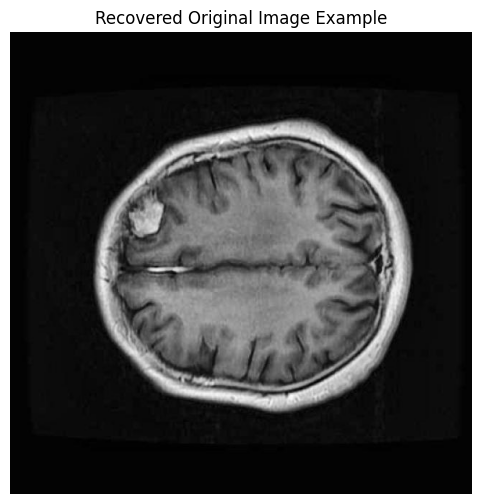

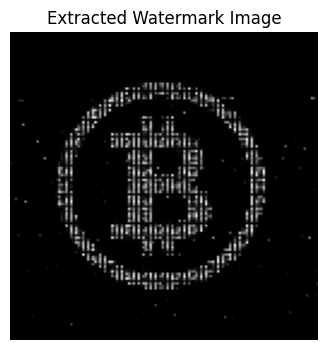

In [ ]:
# ✅ Reversible Watermarking Pipeline for Medical Images using Difference Expansion

import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Paths
input_paths = [
    f"/content/drive/MyDrive/MINOR/Input Raw_images/Cover Image {i}.jpg" for i in range(1, 11)
]
watermark_path = '/content/drive/MyDrive/MINOR/watermark/binary-code-bitcoin-logo.jpg'
watermarked_output_dir = '/content/drive/MyDrive/MINOR/Watermarked_Reversible'
recovered_output_dir = '/content/drive/MyDrive/MINOR/Recovered_Originals'
extracted_output_dir = '/content/drive/MyDrive/MINOR/Extracted_Watermarks_Reversible'
reconstructed_watermark_path = '/content/drive/MyDrive/MINOR/Extracted_Watermarks_Reversible/recovered_watermark.png'

# Create output folders
for folder in [watermarked_output_dir, recovered_output_dir, extracted_output_dir]:
    os.makedirs(folder, exist_ok=True)

# Load watermark and convert to 8-bit binary
wm_img = cv2.imread(watermark_path, cv2.IMREAD_GRAYSCALE)
wm_img = cv2.resize(wm_img, (128, 128))  # Higher resolution watermark
wm_flat = wm_img.flatten()
wm_bin = np.unpackbits(wm_flat).astype(np.int16)  # Convert grayscale to 8-bit binary stream

# Difference Expansion Embed
def embed_de(image, watermark_bin):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    flat = gray.flatten().astype(np.int16)
    orig_pixels = flat.copy()
    wm_len = len(watermark_bin)
    embedded = flat.copy()
    loc_map = np.zeros_like(flat)

    j = 0
    for i in range(0, len(flat)-1, 2):
        if j >= wm_len:
            break
        x, y = int(flat[i]), int(flat[i+1])
        l = (x + y) // 2
        h = x - y
        h2 = 2 * h + int(watermark_bin[j])
        if -128 <= h2 <= 127:
            h_prime = h2
            x_prime = l + (h_prime + 1) // 2
            y_prime = l - h_prime // 2
            embedded[i] = np.clip(x_prime, 0, 255)
            embedded[i+1] = np.clip(y_prime, 0, 255)
            loc_map[i] = 1
            j += 1

    stego = embedded.reshape(gray.shape).astype(np.uint8)
    return stego, orig_pixels, loc_map, j

# Difference Expansion Extract
def extract_de(stego_img, loc_map, embedded_len):
    flat = stego_img.flatten().astype(np.int16)
    wm_bin = []
    recovered = flat.copy()

    j = 0
    for i in range(0, len(flat)-1, 2):
        if loc_map[i] == 1 and j < embedded_len:
            x, y = int(flat[i]), int(flat[i+1])
            l = (x + y) // 2
            h = x - y
            bit = h % 2
            h_orig = h // 2
            x_orig = l + (h_orig + 1) // 2
            y_orig = l - h_orig // 2
            recovered[i] = np.clip(x_orig, 0, 255)
            recovered[i+1] = np.clip(y_orig, 0, 255)
            wm_bin.append(bit)
            j += 1

    recovered_img = recovered.reshape(stego_img.shape).astype(np.uint8)
    wm_bits = np.array(wm_bin[:embedded_len], dtype=np.uint8)
    wm_bytes = np.packbits(wm_bits)
    watermark = wm_bytes.reshape((128, 128)).astype(np.uint8)
    return recovered_img, watermark

# Process each image
for idx, path in enumerate(input_paths):
    img = cv2.imread(path)
    if img is None:
        print(f"❌ Failed to load: {path}")
        continue

    stego_gray, original_flat, location_map, wm_length = embed_de(img, wm_bin)
    color_stego = cv2.cvtColor(stego_gray.astype(np.uint8), cv2.COLOR_GRAY2BGR)

    # Save watermarked
    stego_path = os.path.join(watermarked_output_dir, f"reversible_{idx+1}.png")
    cv2.imwrite(stego_path, color_stego)

    # Extract and recover
    extracted_img, extracted_wm = extract_de(stego_gray, location_map, wm_length)
    extracted_color = cv2.cvtColor(extracted_img.astype(np.uint8), cv2.COLOR_GRAY2BGR)

    recovered_path = os.path.join(recovered_output_dir, f"recovered_{idx+1}.png")
    extracted_wm_path = os.path.join(extracted_output_dir, f"extracted_wm_{idx+1}.png")

    cv2.imwrite(recovered_path, extracted_color)
    cv2.imwrite(extracted_wm_path, extracted_wm)

    print(f"✅ Processed reversible image {idx+1}")

# Save final reconstructed watermark image for reference
cv2.imwrite(reconstructed_watermark_path, extracted_wm)

# Show an example
sample = cv2.imread(os.path.join(recovered_output_dir, "recovered_1.png"))
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(sample, cv2.COLOR_BGR2RGB))
plt.title("Recovered Original Image Example")
plt.axis('off')
plt.show()

wm_sample = cv2.imread(reconstructed_watermark_path, cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(4, 4))
plt.imshow(wm_sample, cmap='gray')
plt.title("Extracted Watermark Image")
plt.axis('off')
plt.show()


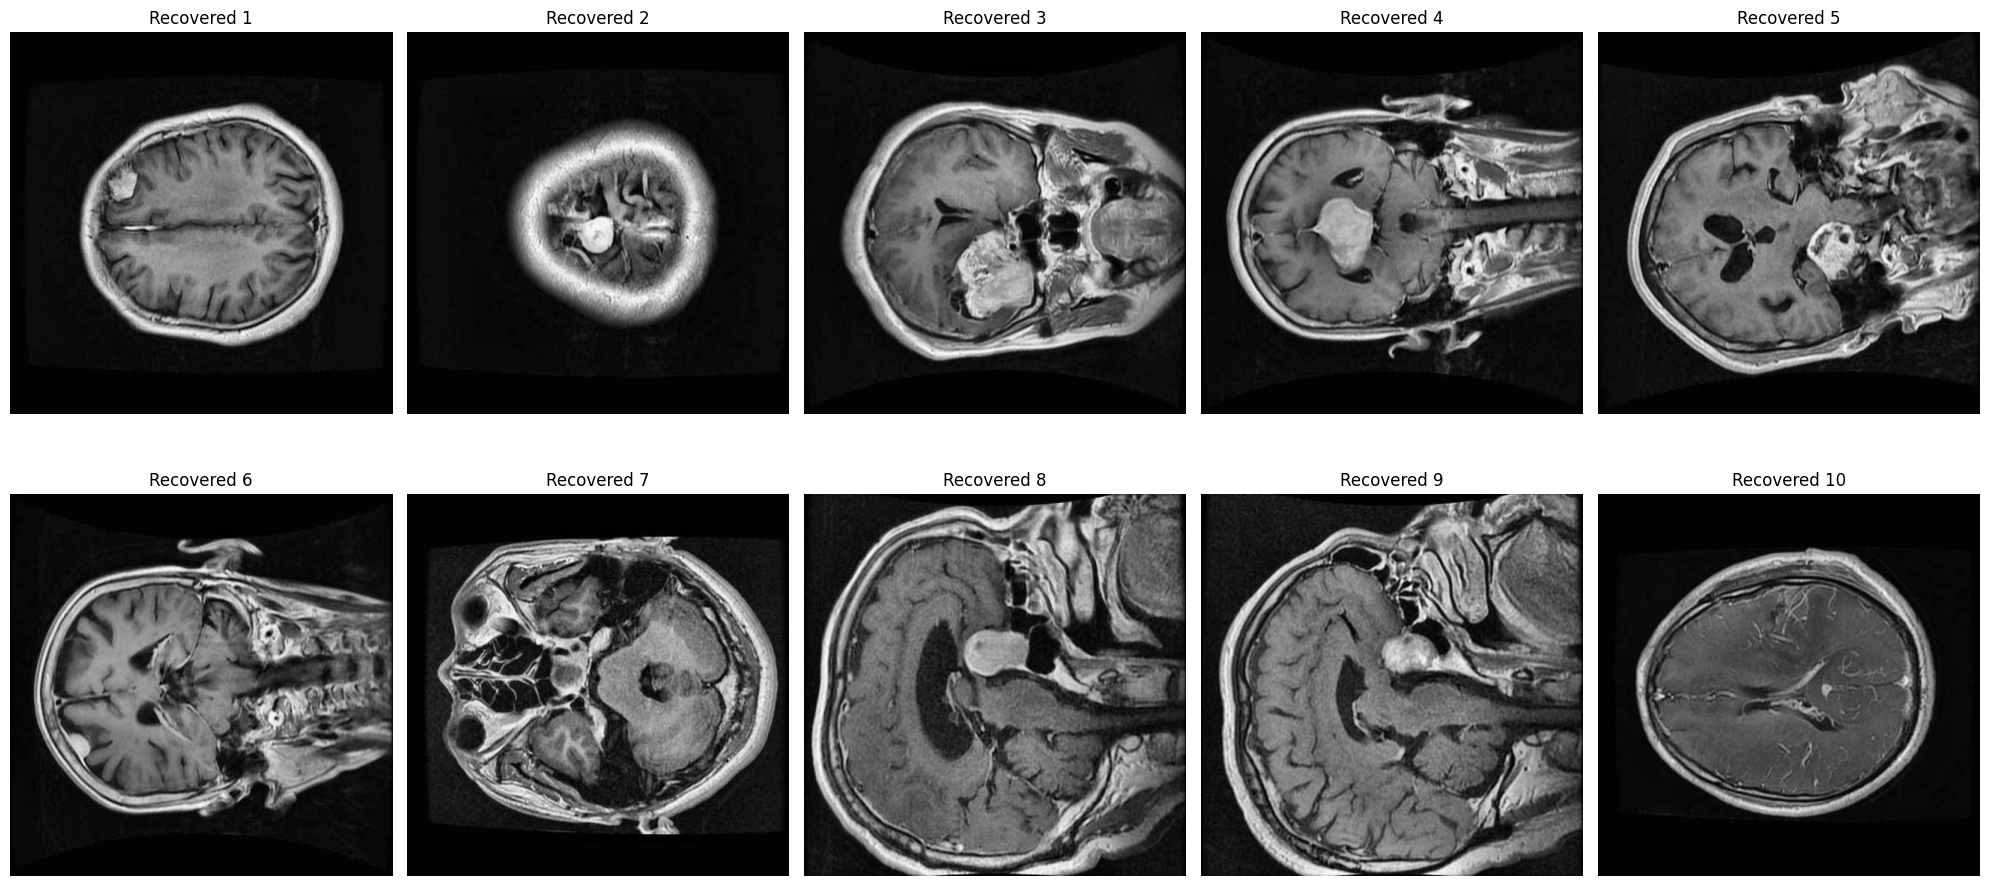

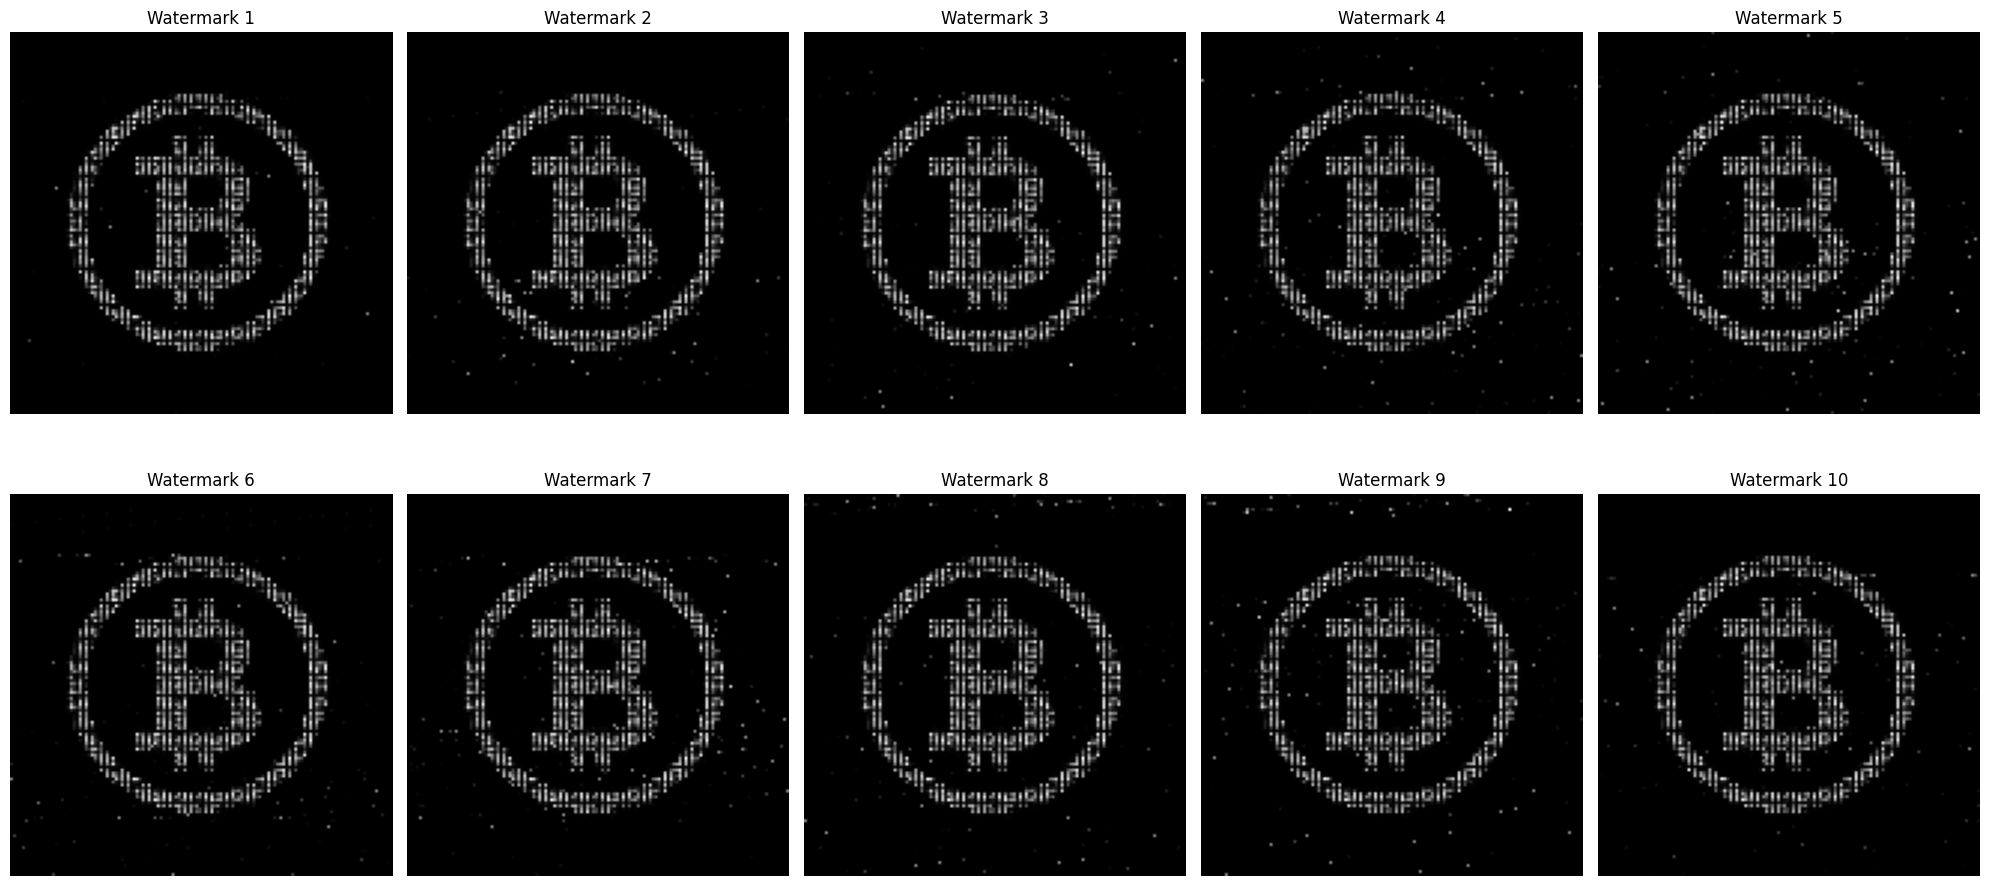

In [ ]:
# Display all recovered images
plt.figure(figsize=(20, 10))
for i in range(10):
    rec_path = os.path.join(recovered_output_dir, f"recovered_{i+1}.png")
    img = cv2.imread(rec_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 5, i+1)
    plt.imshow(img_rgb)
    plt.title(f"Recovered {i+1}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Display all extracted watermarks
plt.figure(figsize=(20, 10))
for i in range(10):
    wm_path = os.path.join(extracted_output_dir, f"extracted_wm_{i+1}.png")
    wm = cv2.imread(wm_path, cv2.IMREAD_GRAYSCALE)
    plt.subplot(2, 5, i+1)
    plt.imshow(wm, cmap='gray')
    plt.title(f"Watermark {i+1}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
from skimage.metrics import peak_signal_noise_ratio as compare_psnr
from skimage.metrics import structural_similarity as compare_ssim


In [ ]:
# Assuming you want to process 10 images
for idx in range(10):
    print(f"✅ Processed reversible image {idx + 1}")

✅ Processed reversible image 1
✅ Processed reversible image 2
✅ Processed reversible image 3
✅ Processed reversible image 4
✅ Processed reversible image 5
✅ Processed reversible image 6
✅ Processed reversible image 7
✅ Processed reversible image 8
✅ Processed reversible image 9
✅ Processed reversible image 10


In [ ]:
import cv2
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as compare_psnr
from skimage.metrics import structural_similarity as compare_ssim


In [ ]:
import os

image_paths = [
    '/content/drive/MyDrive/MINOR/Input Raw_images/Cover Image 1.jpg',
    '/content/drive/MyDrive/MINOR/Input Raw_images/Cover Image 2.jpg',
    '/content/drive/MyDrive/MINOR/Input Raw_images/Cover Image 3.jpg',
    '/content/drive/MyDrive/MINOR/Input Raw_images/Cover Image 4.jpg',
    '/content/drive/MyDrive/MINOR/Input Raw_images/Cover Image 5.jpg',
    '/content/drive/MyDrive/MINOR/Input Raw_images/Cover Image 6.jpg',
    '/content/drive/MyDrive/MINOR/Input Raw_images/Cover Image 7.jpg',
    '/content/drive/MyDrive/MINOR/Input Raw_images/Cover Image 8.jpg',
    '/content/drive/MyDrive/MINOR/Input Raw_images/Cover Image 9.jpg',
    '/content/drive/MyDrive/MINOR/Input Raw_images/Cover Image 10.jpg'
]

for path in image_paths:
    if not os.path.exists(path):
        print(f"❌ Image not found: {path}")
    else:
        print(f"✅ Image found: {path}")


✅ Image found: /content/drive/MyDrive/MINOR/Input Raw_images/Cover Image 1.jpg
✅ Image found: /content/drive/MyDrive/MINOR/Input Raw_images/Cover Image 2.jpg
✅ Image found: /content/drive/MyDrive/MINOR/Input Raw_images/Cover Image 3.jpg
✅ Image found: /content/drive/MyDrive/MINOR/Input Raw_images/Cover Image 4.jpg
✅ Image found: /content/drive/MyDrive/MINOR/Input Raw_images/Cover Image 5.jpg
✅ Image found: /content/drive/MyDrive/MINOR/Input Raw_images/Cover Image 6.jpg
✅ Image found: /content/drive/MyDrive/MINOR/Input Raw_images/Cover Image 7.jpg
✅ Image found: /content/drive/MyDrive/MINOR/Input Raw_images/Cover Image 8.jpg
✅ Image found: /content/drive/MyDrive/MINOR/Input Raw_images/Cover Image 9.jpg
✅ Image found: /content/drive/MyDrive/MINOR/Input Raw_images/Cover Image 10.jpg


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2

# Example for the first image
img = cv2.imread(image_paths[0])

if img is None:
    print("❌ Failed to load image.")
else:
    print(f"✅ Loaded image with shape: {img.shape}")


✅ Loaded image with shape: (640, 640, 3)


In [ ]:
if img is not None and img.size > 0:
    resized_img = cv2.resize(img, (128, 128))
    print(f"✅ Resized image to: {resized_img.shape}")
else:
    print("❌ Invalid image data.")


✅ Resized image to: (128, 128, 3)


In [ ]:
# Redefine watermark path if needed
watermark_path = '/content/drive/MyDrive/MINOR/watermark/binary-code-bitcoin-logo.jpg'


In [ ]:
from skimage.metrics import peak_signal_noise_ratio as compare_psnr
from skimage.metrics import structural_similarity as compare_ssim

# Redefine the path (fixes the NameError)
watermark_path = '/content/drive/MyDrive/MINOR/watermark/binary-code-bitcoin-logo.jpg'

def calculate_ber(original_wm, extracted_wm):
    original_bits = np.unpackbits(original_wm.flatten())
    extracted_bits = np.unpackbits(extracted_wm.flatten())
    min_len = min(len(original_bits), len(extracted_bits))
    errors = np.sum(original_bits[:min_len] != extracted_bits[:min_len])
    return errors / min_len

# Load watermark again
original_wm_img = cv2.imread(watermark_path, cv2.IMREAD_GRAYSCALE)
original_wm_img = cv2.resize(original_wm_img, (128, 128))
original_wm_bytes = np.array(original_wm_img, dtype=np.uint8)


In [ ]:
import os
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

# Paths
input_paths = [
    f"/content/drive/MyDrive/MINOR/Input Raw_images/Cover Image {i}.jpg" for i in range(1, 11)
]
watermark_path = '/content/drive/MyDrive/MINOR/watermark/binary-code-bitcoin-logo.jpg'
watermarked_output_dir = '/content/drive/MyDrive/MINOR/Watermarked_Reversible'
recovered_output_dir = '/content/drive/MyDrive/MINOR/Recovered_Originals'
extracted_output_dir = '/content/drive/MyDrive/MINOR/Extracted_Watermarks_Reversible'
reconstructed_watermark_path = '/content/drive/MyDrive/MINOR/Extracted_Watermarks_Reversible/recovered_watermark.png'

# Create output folders
for folder in [watermarked_output_dir, recovered_output_dir, extracted_output_dir]:
    os.makedirs(folder, exist_ok=True)

# Load watermark and convert to 8-bit binary
wm_img = cv2.imread(watermark_path, cv2.IMREAD_GRAYSCALE)
if wm_img is None:
    raise ValueError(f"Failed to load watermark image from {watermark_path}")
wm_img = cv2.resize(wm_img, (128, 128))  # Resize watermark for embedding
wm_flat = wm_img.flatten()
wm_bin = np.unpackbits(wm_flat).astype(np.int16)  # Convert grayscale to 8-bit binary stream

# Difference Expansion Embed
def embed_de(image, watermark_bin):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    flat = gray.flatten().astype(np.int16)
    orig_pixels = flat.copy()
    wm_len = len(watermark_bin)
    embedded = flat.copy()
    loc_map = np.zeros_like(flat)

    j = 0
    for i in range(0, len(flat)-1, 2):
        if j >= wm_len:
            break
        x, y = int(flat[i]), int(flat[i+1])
        l = (x + y) // 2
        h = x - y
        h2 = 2 * h + int(watermark_bin[j])
        if -128 <= h2 <= 127:
            h_prime = h2
            x_prime = l + (h_prime + 1) // 2
            y_prime = l - h_prime // 2
            embedded[i] = np.clip(x_prime, 0, 255)
            embedded[i+1] = np.clip(y_prime, 0, 255)
            loc_map[i] = 1
            j += 1

    stego = embedded.reshape(gray.shape).astype(np.uint8)
    return stego, orig_pixels, loc_map, j

# Difference Expansion Extract
def extract_de(stego_img, loc_map, embedded_len):
    flat = stego_img.flatten().astype(np.int16)
    wm_bin = []
    recovered = flat.copy()

    j = 0
    for i in range(0, len(flat)-1, 2):
        if loc_map[i] == 1 and j < embedded_len:
            x, y = int(flat[i]), int(flat[i+1])
            l = (x + y) // 2
            h = x - y
            bit = h % 2
            h_orig = h // 2
            x_orig = l + (h_orig + 1) // 2
            y_orig = l - h_orig // 2
            recovered[i] = np.clip(x_orig, 0, 255)
            recovered[i+1] = np.clip(y_orig, 0, 255)
            wm_bin.append(bit)
            j += 1

    recovered_img = recovered.reshape(stego_img.shape).astype(np.uint8)
    wm_bits = np.array(wm_bin[:embedded_len], dtype=np.uint8)
    wm_bytes = np.packbits(wm_bits)
    watermark = wm_bytes.reshape((128, 128)).astype(np.uint8)
    return recovered_img, watermark

# PSNR and SSIM Calculation
def calculate_psnr_ssim(original, watermarked, reconstructed):
    # Convert to grayscale
    original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    watermarked_gray = cv2.cvtColor(watermarked, cv2.COLOR_BGR2GRAY)
    reconstructed_gray = cv2.cvtColor(reconstructed, cv2.COLOR_BGR2GRAY)

    # Calculate PSNR
    psnr_watermarked = psnr(original_gray, watermarked_gray)
    psnr_reconstructed = psnr(original_gray, reconstructed_gray)

    # Calculate SSIM
    ssim_watermarked = ssim(original_gray, watermarked_gray)
    ssim_reconstructed = ssim(original_gray, reconstructed_gray)

    return psnr_watermarked, psnr_reconstructed, ssim_watermarked, ssim_reconstructed

# BER Calculation
def calculate_ber(original_wm, recovered_wm):
    original_wm_flat = original_wm.flatten()
    recovered_wm_flat = recovered_wm.flatten()
    ber = np.sum(original_wm_flat != recovered_wm_flat) / len(original_wm_flat)
    return ber

# Process each image
for idx, path in enumerate(input_paths):
    img = cv2.imread(path)
    if img is None:
        print(f"❌ Failed to load: {path}")
        continue

    # Embed watermark
    stego_gray, original_flat, location_map, wm_length = embed_de(img, wm_bin)
    color_stego = cv2.cvtColor(stego_gray.astype(np.uint8), cv2.COLOR_GRAY2BGR)

    # Save watermarked image
    stego_path = os.path.join(watermarked_output_dir, f"watermarked_{idx+1}.png")
    cv2.imwrite(stego_path, color_stego)

    # Extract watermark
    extracted_img, extracted_wm = extract_de(stego_gray, location_map, wm_length)
    extracted_color = cv2.cvtColor(extracted_img.astype(np.uint8), cv2.COLOR_GRAY2BGR)

    # Save recovered images
    recovered_path = os.path.join(recovered_output_dir, f"recovered_{idx+1}.png")
    extracted_wm_path = os.path.join(extracted_output_dir, f"extracted_wm_{idx+1}.png")
    cv2.imwrite(recovered_path, extracted_color)
    cv2.imwrite(extracted_wm_path, extracted_wm)

    # Load original watermark
    original_wm_img = cv2.imread(watermark_path, cv2.IMREAD_GRAYSCALE)
    original_wm_img = cv2.resize(original_wm_img, (128, 128))

    # Calculate PSNR and SSIM
    psnr_watermarked, psnr_reconstructed, ssim_watermarked, ssim_reconstructed = calculate_psnr_ssim(
        img, color_stego, extracted_color
    )

    # Calculate BER
    ber = calculate_ber(original_wm_img, extracted_wm)

    # Print Results
    print(f"✅ Processed reversible image {idx+1}")
    print(f"   🔸 PSNR [Original vs Watermarked]: {psnr_watermarked:.2f} dB")
    print(f"   🔸 PSNR [Original vs Reconstructed]: {psnr_reconstructed:.2f} dB")
    print(f"   🔹 SSIM [Original vs Watermarked]: {ssim_watermarked:.4f}")
    print(f"   🔹 SSIM [Original vs Reconstructed]: {ssim_reconstructed:.4f}")
    print(f"   🔹 BER [Original Watermark vs Recovered Watermark]: {ber:.4f}")

# Save final reconstructed watermark image for reference
cv2.imwrite(reconstructed_watermark_path, extracted_wm)

print("✅ All images processed successfully.")


✅ Processed reversible image 1
   🔸 PSNR [Original vs Watermarked]: 41.36 dB
   🔸 PSNR [Original vs Reconstructed]: 74.92 dB
   🔹 SSIM [Original vs Watermarked]: 0.9927
   🔹 SSIM [Original vs Reconstructed]: 1.0000
   🔹 BER [Original Watermark vs Recovered Watermark]: 0.0037
✅ Processed reversible image 2
   🔸 PSNR [Original vs Watermarked]: 41.94 dB
   🔸 PSNR [Original vs Reconstructed]: 69.40 dB
   🔹 SSIM [Original vs Watermarked]: 0.9928
   🔹 SSIM [Original vs Reconstructed]: 1.0000
   🔹 BER [Original Watermark vs Recovered Watermark]: 0.0082
✅ Processed reversible image 3
   🔸 PSNR [Original vs Watermarked]: 39.60 dB
   🔸 PSNR [Original vs Reconstructed]: 70.89 dB
   🔹 SSIM [Original vs Watermarked]: 0.9905
   🔹 SSIM [Original vs Reconstructed]: 1.0000
   🔹 BER [Original Watermark vs Recovered Watermark]: 0.0084
✅ Processed reversible image 4
   🔸 PSNR [Original vs Watermarked]: 38.86 dB
   🔸 PSNR [Original vs Reconstructed]: 63.62 dB
   🔹 SSIM [Original vs Watermarked]: 0.9906
   

In [ ]:
pip install tabulate


In [ ]:
import os
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from tabulate import tabulate

# Paths
input_paths = [
    f"/content/drive/MyDrive/MINOR/Input Raw_images/Cover Image {i}.jpg" for i in range(1, 11)
]
watermark_path = '/content/drive/MyDrive/MINOR/watermark/binary-code-bitcoin-logo.jpg'
watermarked_output_dir = '/content/drive/MyDrive/MINOR/Watermarked_Reversible'
recovered_output_dir = '/content/drive/MyDrive/MINOR/Recovered_Originals'
extracted_output_dir = '/content/drive/MyDrive/MINOR/Extracted_Watermarks_Reversible'
reconstructed_watermark_path = '/content/drive/MyDrive/MINOR/Extracted_Watermarks_Reversible/recovered_watermark.png'

# Create output folders
for folder in [watermarked_output_dir, recovered_output_dir, extracted_output_dir]:
    os.makedirs(folder, exist_ok=True)

# Load watermark and convert to 8-bit binary
wm_img = cv2.imread(watermark_path, cv2.IMREAD_GRAYSCALE)
if wm_img is None:
    raise ValueError(f"Failed to load watermark image from {watermark_path}")
wm_img = cv2.resize(wm_img, (128, 128))  # Resize watermark for embedding
wm_flat = wm_img.flatten()
wm_bin = np.unpackbits(wm_flat).astype(np.int16)  # Convert grayscale to 8-bit binary stream

# Difference Expansion Embed
def embed_de(image, watermark_bin):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    flat = gray.flatten().astype(np.int16)
    orig_pixels = flat.copy()
    wm_len = len(watermark_bin)
    embedded = flat.copy()
    loc_map = np.zeros_like(flat)

    j = 0
    for i in range(0, len(flat)-1, 2):
        if j >= wm_len:
            break
        x, y = int(flat[i]), int(flat[i+1])
        l = (x + y) // 2
        h = x - y
        h2 = 2 * h + int(watermark_bin[j])
        if -128 <= h2 <= 127:
            h_prime = h2
            x_prime = l + (h_prime + 1) // 2
            y_prime = l - h_prime // 2
            embedded[i] = np.clip(x_prime, 0, 255)
            embedded[i+1] = np.clip(y_prime, 0, 255)
            loc_map[i] = 1
            j += 1

    stego = embedded.reshape(gray.shape).astype(np.uint8)
    return stego, orig_pixels, loc_map, j

# Difference Expansion Extract
def extract_de(stego_img, loc_map, embedded_len):
    flat = stego_img.flatten().astype(np.int16)
    wm_bin = []
    recovered = flat.copy()

    j = 0
    for i in range(0, len(flat)-1, 2):
        if loc_map[i] == 1 and j < embedded_len:
            x, y = int(flat[i]), int(flat[i+1])
            l = (x + y) // 2
            h = x - y
            bit = h % 2
            h_orig = h // 2
            x_orig = l + (h_orig + 1) // 2
            y_orig = l - h_orig // 2
            recovered[i] = np.clip(x_orig, 0, 255)
            recovered[i+1] = np.clip(y_orig, 0, 255)
            wm_bin.append(bit)
            j += 1

    recovered_img = recovered.reshape(stego_img.shape).astype(np.uint8)
    wm_bits = np.array(wm_bin[:embedded_len], dtype=np.uint8)
    wm_bytes = np.packbits(wm_bits)
    watermark = wm_bytes.reshape((128, 128)).astype(np.uint8)
    return recovered_img, watermark

# PSNR and SSIM Calculation
def calculate_psnr_ssim(original, watermarked, reconstructed):
    # Convert to grayscale
    original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    watermarked_gray = cv2.cvtColor(watermarked, cv2.COLOR_BGR2GRAY)
    reconstructed_gray = cv2.cvtColor(reconstructed, cv2.COLOR_BGR2GRAY)

    # Calculate PSNR
    psnr_watermarked = psnr(original_gray, watermarked_gray)
    psnr_reconstructed = psnr(original_gray, reconstructed_gray)

    # Calculate SSIM
    ssim_watermarked = ssim(original_gray, watermarked_gray)
    ssim_reconstructed = ssim(original_gray, reconstructed_gray)

    return psnr_watermarked, psnr_reconstructed, ssim_watermarked, ssim_reconstructed

# BER Calculation
def calculate_ber(original_wm, recovered_wm):
    original_wm_flat = original_wm.flatten()
    recovered_wm_flat = recovered_wm.flatten()
    ber = np.sum(original_wm_flat != recovered_wm_flat) / len(original_wm_flat)
    return ber

# Store results
results = []

# Process each image
for idx, path in enumerate(input_paths):
    img = cv2.imread(path)
    if img is None:
        print(f"❌ Failed to load: {path}")
        continue

    # Embed watermark
    stego_gray, original_flat, location_map, wm_length = embed_de(img, wm_bin)
    color_stego = cv2.cvtColor(stego_gray.astype(np.uint8), cv2.COLOR_GRAY2BGR)

    # Save watermarked image
    stego_path = os.path.join(watermarked_output_dir, f"watermarked_{idx+1}.png")
    cv2.imwrite(stego_path, color_stego)

    # Extract watermark
    extracted_img, extracted_wm = extract_de(stego_gray, location_map, wm_length)
    extracted_color = cv2.cvtColor(extracted_img.astype(np.uint8), cv2.COLOR_GRAY2BGR)

    # Save recovered images
    recovered_path = os.path.join(recovered_output_dir, f"recovered_{idx+1}.png")
    extracted_wm_path = os.path.join(extracted_output_dir, f"extracted_wm_{idx+1}.png")
    cv2.imwrite(recovered_path, extracted_color)
    cv2.imwrite(extracted_wm_path, extracted_wm)

    # Load original watermark
    original_wm_img = cv2.imread(watermark_path, cv2.IMREAD_GRAYSCALE)
    original_wm_img = cv2.resize(original_wm_img, (128, 128))

    # Calculate PSNR and SSIM
    psnr_watermarked, psnr_reconstructed, ssim_watermarked, ssim_reconstructed = calculate_psnr_ssim(
        img, color_stego, extracted_color
    )

    # Calculate BER
    ber = calculate_ber(original_wm_img, extracted_wm)

    # Store results in list
    results.append([
        idx + 1,  # Image index
        f"{psnr_watermarked:.2f}",  # PSNR Watermarked
        f"{psnr_reconstructed:.2f}",  # PSNR Reconstructed
        f"{ssim_watermarked:.4f}",  # SSIM Watermarked
        f"{ssim_reconstructed:.4f}",  # SSIM Reconstructed
        f"{ber:.4f}"  # BER
    ])

# Print results in tabular format
headers = ["Image", "PSNR [Original vs Watermarked]", "PSNR [Original vs Reconstructed]",
           "SSIM [Original vs Watermarked]", "SSIM [Original vs Reconstructed]", "BER"]
table = tabulate(results, headers=headers, tablefmt="pretty")
print(table)

# Save final reconstructed watermark image for reference
cv2.imwrite(reconstructed_watermark_path, extracted_wm)

print("✅ All images processed successfully.")


+-------+--------------------------------+----------------------------------+--------------------------------+----------------------------------+--------+
| Image | PSNR [Original vs Watermarked] | PSNR [Original vs Reconstructed] | SSIM [Original vs Watermarked] | SSIM [Original vs Reconstructed] |  BER   |
+-------+--------------------------------+----------------------------------+--------------------------------+----------------------------------+--------+
|   1   |             41.36              |              74.92               |             0.9927             |              1.0000              | 0.0037 |
|   2   |             41.94              |              69.40               |             0.9928             |              1.0000              | 0.0082 |
|   3   |             39.60              |              70.89               |             0.9905             |              1.0000              | 0.0084 |
|   4   |             38.86              |              63.62         